<a href="https://colab.research.google.com/github/ross13elder/ross13elder.github.io/blob/main/Easy_VISA_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EasyVisa Project

## Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

## Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired your firm EasyVisa for data-driven solutions. You as a data scientist have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.


## Data Description

The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Importing necessary libraries and data

In [ ]:
# Library to suppress warnings or deprecation notes
import warnings
warnings.filterwarnings('ignore')

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Libraries to split data, impute missing values
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Libraries to import decision tree classifier and different ensemble classifiers
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    StackingClassifier
)
from xgboost import XGBClassifier

# Libraries to tune model, and get different metric scores
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    ConfusionMatrixDisplay,
    make_scorer
)
from sklearn.model_selection import GridSearchCV
import scipy.stats as stats

In [ ]:
# Mounting Google Drive to the notebook
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Loading the dataset
EasyVisa = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Ensemble Techniques/Project/EasyVisa.csv")

In [ ]:
# copying data to another variable to avoid any changes to original data
data = EasyVisa

## Data Overview

In [ ]:
# View first 5 rows of dataset
data.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [ ]:
# View last 5 rows of dataset
data.tail()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,Certified


In [ ]:
# Checking shape of dataset
data.shape

(25480, 12)

- There are 25480 rows (applications) and 12 columns

In [ ]:
# Checking data types of columns for dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


- There are 3 numeric columns and 9 object columns in the data set
- case_status is the dependent variable which is of an object type

*Converting objects to category to reduce the data space required to store dataframe*

In [ ]:
# Showing columns to be changed
cols = data.select_dtypes(['object'])
cols.columns

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'region_of_employment', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [ ]:
# Changing objects to columns
for i in cols.columns:
  data[i] = data[i].astype('category')

In [ ]:
# Checking to the changes took place
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   case_id                25480 non-null  category
 1   continent              25480 non-null  category
 2   education_of_employee  25480 non-null  category
 3   has_job_experience     25480 non-null  category
 4   requires_job_training  25480 non-null  category
 5   no_of_employees        25480 non-null  int64   
 6   yr_of_estab            25480 non-null  int64   
 7   region_of_employment   25480 non-null  category
 8   prevailing_wage        25480 non-null  float64 
 9   unit_of_wage           25480 non-null  category
 10  full_time_position     25480 non-null  category
 11  case_status            25480 non-null  category
dtypes: category(9), float64(1), int64(2)
memory usage: 2.0 MB


Making this changed decreaded the usage by almost ~1.5 MB (2.3 MB to 797.7 KB)

In [ ]:
# Checking missing values
data.isnull().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

- There are no missing values in the dataset

In [ ]:
# Checking for duplicate values
data.duplicated().sum()

0

- There are no duplicated entries in the dataset

In [ ]:
data.case_id.nunique()

25480

In [ ]:
# Removing case_id column, since it has only unique values
data = data.drop(['case_id'], axis = 1)

# Checking to make sure case_id column was dropped
data.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [ ]:
# Checking number of observations in each category
cat_cols = list(data.select_dtypes('object').columns)

for column in cat_cols:
    print(data[column].value_counts())
    print('-'*50)

In [ ]:
# Checking the Statistical Summary of dataset
data.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.043210,22877.928848,-26.0000,1022.00,2109.00,3504.0000,602069.00
yr_of_estab,25480.0,1979.409929,42.366929,1800.0000,1976.00,1997.00,2005.0000,2016.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27


- Applications are from every continent where people live, and Asia was the most previlent
- Most applicants hav a bachlor's degree
- Most have job experience
- Number of employees in the employer's company has a large spread from -26 to 602,069 employees.  (The -26 seems interesting because the least amount of employees would be zero, so this is something we will look into). The mean is ~5667 and median of 2109, showing this is a highly right skewed distribution.
- Year the company was established has a range of 216, from 1800 - 2016.
- There are 5 regions of the US where employers reside, and the Northeast is the most sought after.
- The average prevailing_wage is ~74,455
- Most applicants are recieving a yearly wage
- Most applicants are seeking full-time employement
- Most applicants do get a Visa certification

In [ ]:
# Looking into the negative number of employees
negative = data[(data['no_of_employees'] < 0)]
print(negative)
print(negative.shape)

           continent education_of_employee has_job_experience  \
245           Europe              Master's                  N   
378             Asia            Bachelor's                  N   
832    South America              Master's                  Y   
2918            Asia              Master's                  Y   
6439            Asia            Bachelor's                  N   
6634            Asia            Bachelor's                  Y   
7224          Europe             Doctorate                  N   
7281            Asia           High School                  N   
7318            Asia            Bachelor's                  Y   
7761            Asia              Master's                  N   
9872          Europe              Master's                  Y   
11493           Asia           High School                  Y   
13471  North America              Master's                  N   
14022           Asia            Bachelor's                  N   
14146           Asia     

- There are 33 applications that have negative employees.  This is is most likely a mistake and they should be positive values because you can't have negative employees.

In [ ]:
# Changing negative values of employees to positives using absolute value
data['no_of_employees'] = abs(data['no_of_employees'])

# Check to make sure no more negative employees
data.loc[(data['no_of_employees']<0)].shape

(0, 11)

- There are no more negative employee numbers

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification?

2. How does the visa status vary across different continents?

3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status?

4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa?

5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

####Functions to help with Univariate Analysis

In [ ]:
# function to create histogram and boxplot on same scale

def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

###Univariate Analysis

#### Observations on Continent

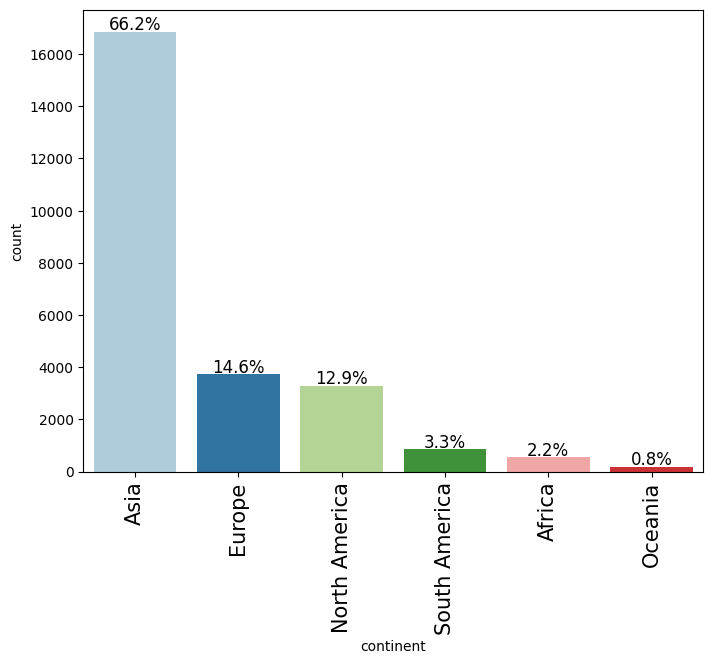

Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: continent, dtype: int64

In [ ]:
labeled_barplot(data, 'continent', perc=True)
data['continent'].value_counts()

- Asia is the majority of applicants with ~66%
- Oceania I am assuming is referring to Australia has the least with less than 1%.

#### Observations on Education of Employee

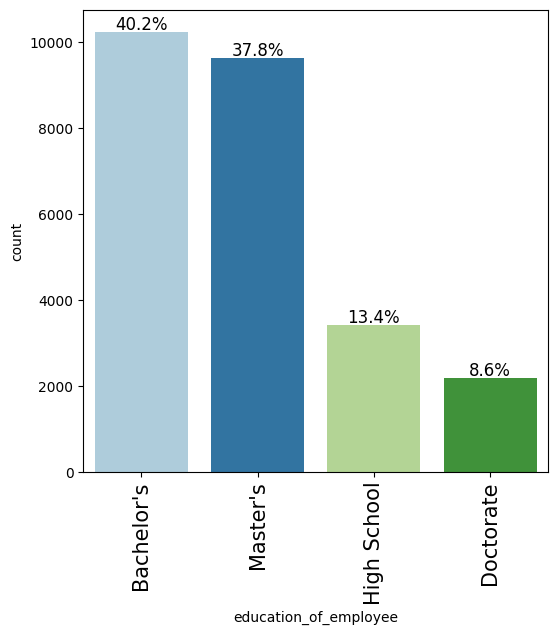

Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: education_of_employee, dtype: int64

In [ ]:
labeled_barplot(data, 'education_of_employee', perc=True)
data['education_of_employee'].value_counts()

- Bachelor's degree is the most prevelant education amoung the applicants with doctorate's being the least.
- This is showing also showing that ~87% of applicants have a good(greater than high school) educational background

#### Observations on Job Experience

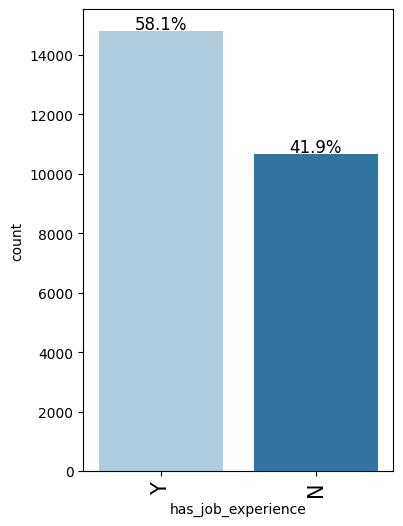

Y    14802
N    10678
Name: has_job_experience, dtype: int64

In [ ]:
labeled_barplot(data, 'has_job_experience', perc=True)
data['has_job_experience'].value_counts()

- Most applicants have job experience for what they are applying

#### Observations on Requiring Job Training

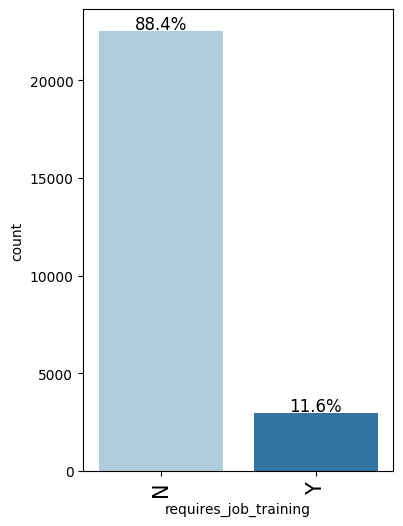

N    22525
Y     2955
Name: requires_job_training, dtype: int64

In [ ]:
labeled_barplot(data, 'requires_job_training', perc=True)
data['requires_job_training'].value_counts()

- ~88% of applicants are needing some job training.

#### Observations on Number of Employees in the company

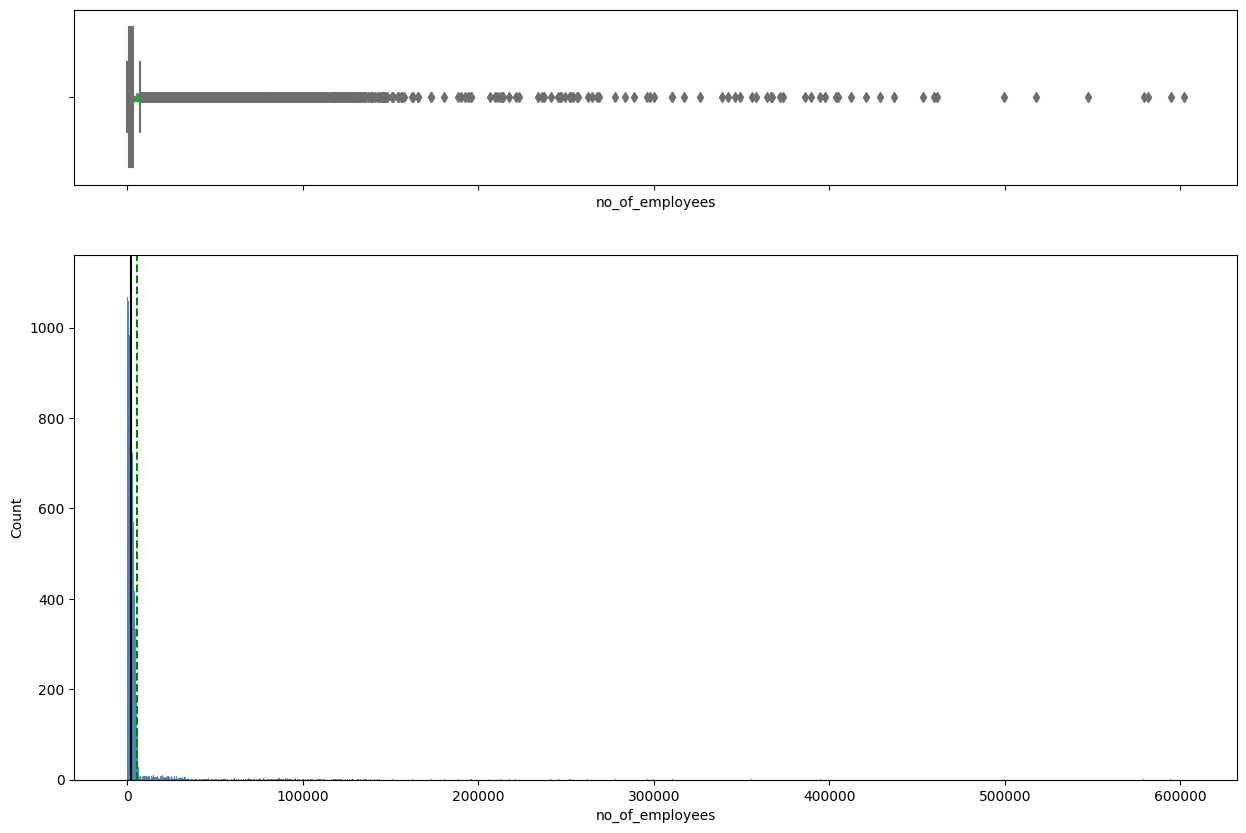

In [ ]:
histogram_boxplot(data, 'no_of_employees')

In [ ]:
#Top 5 highest values
data['no_of_employees'].nlargest()

21339    602069
1345     594472
20345    581468
11317    579004
9587     547172
Name: no_of_employees, dtype: int64

In [ ]:
#Bottom 5 lowest values
data['no_of_employees'].nsmallest()

378      11
7761     11
14022    11
14726    11
15859    11
Name: no_of_employees, dtype: int64

- The distribution is highly right skewed, with a median of 2109 employees, a range of 602,058, and several high outliers.

#### Observations on Establishment Year of company

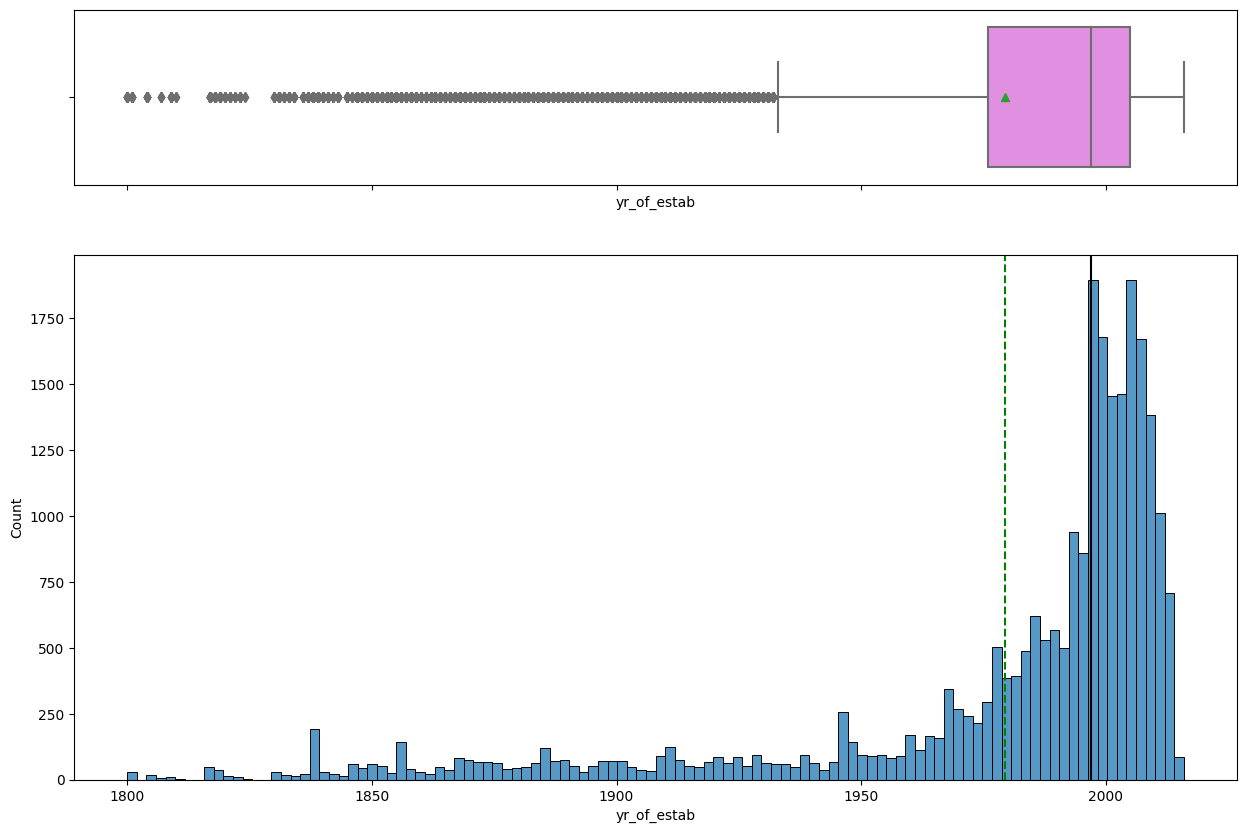

In [ ]:
histogram_boxplot(data, 'yr_of_estab')

- The distribution of establishment years is left-skewed, with a median of 1997, range of 216, and several low outliers.

#### Observations on Region of Employment in the US

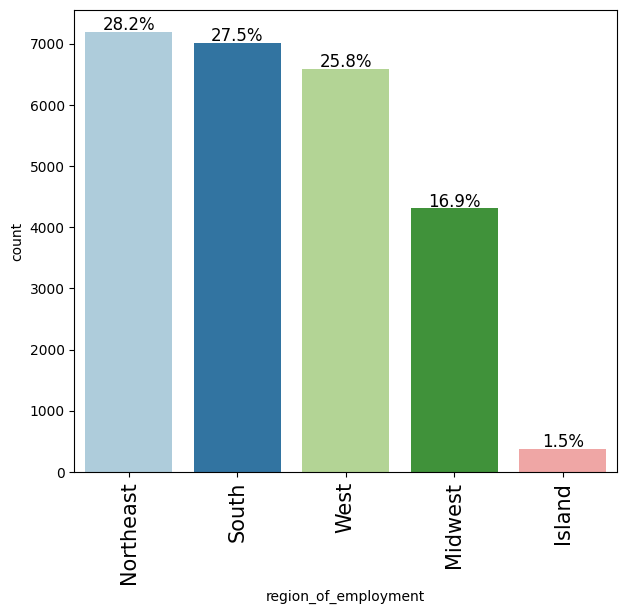

Northeast    7195
South        7017
West         6586
Midwest      4307
Island        375
Name: region_of_employment, dtype: int64

In [ ]:
labeled_barplot(data, 'region_of_employment', perc=True)
data['region_of_employment'].value_counts()

- Northeast is the most sought after region, followed by the South and West.
- Island is the least sought after region, which makes sense because there is a great population on the islands in the US relative to the other regions.

#### Observations on Prevailing Wage

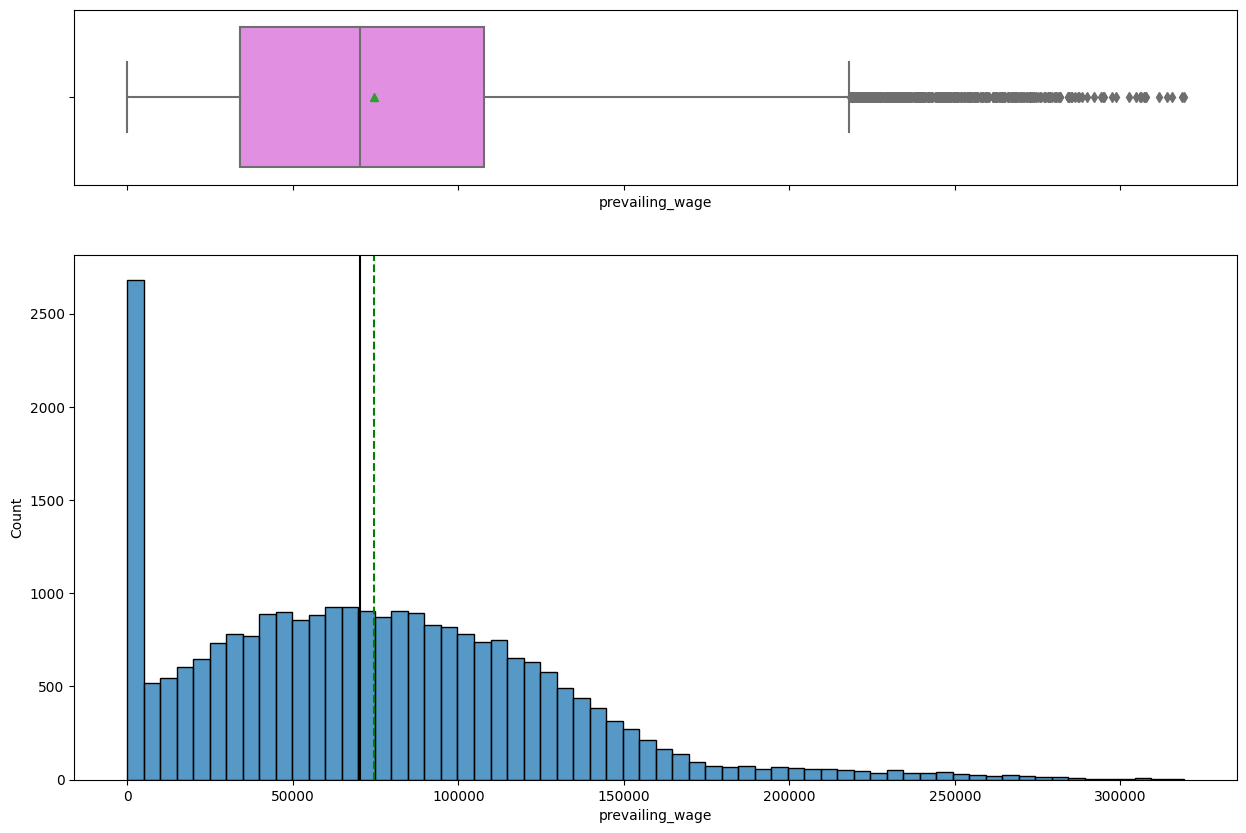

In [ ]:
histogram_boxplot(data, 'prevailing_wage')

In [ ]:
# Seeing how many applicants were less than 5,000
data.loc[(data['prevailing_wage'] < 5000)].shape

(2682, 11)

- The distribution is a right skewed, with almost a bell-shaped curve, excluding the 2682 applicants that make less than 5000 for their prevailing wage.
- There are several high outliers, a range ~320,000, a median of ~70,300.  

#### Observations on Unit of Wage

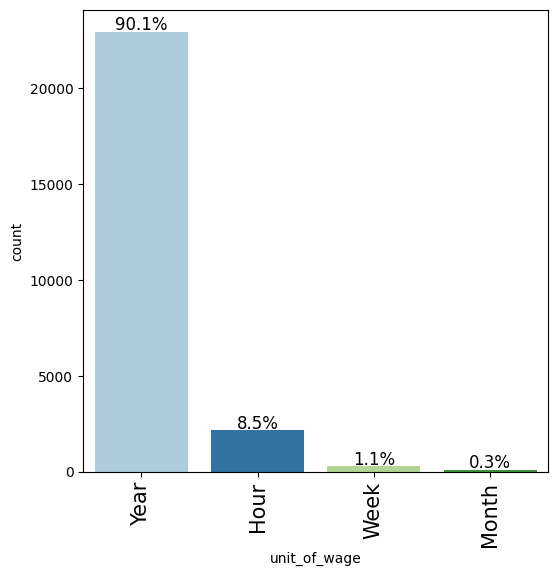

Year     22962
Hour      2157
Week       272
Month       89
Name: unit_of_wage, dtype: int64

In [ ]:
labeled_barplot(data, 'unit_of_wage', perc=True)
data['unit_of_wage'].value_counts()

- Yearly pay is the overwhelming majority of unit of wage (~90%), followed by hourly (~8.5%)
- Monthly is the least with less than 1%

#### Observations on Full-time employement

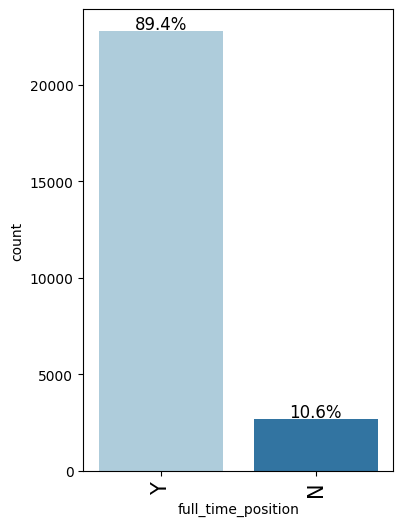

Y    22773
N     2707
Name: full_time_position, dtype: int64

In [ ]:
labeled_barplot(data, 'full_time_position', perc=True)
data['full_time_position'].value_counts()

- Almost 90% of applicants are wanting full time employement.  This makes sense becasue if you are moving to another continent you want to make sure you have a full time job to be successful in the transition.

#### Observations on Certified or Denied Visa

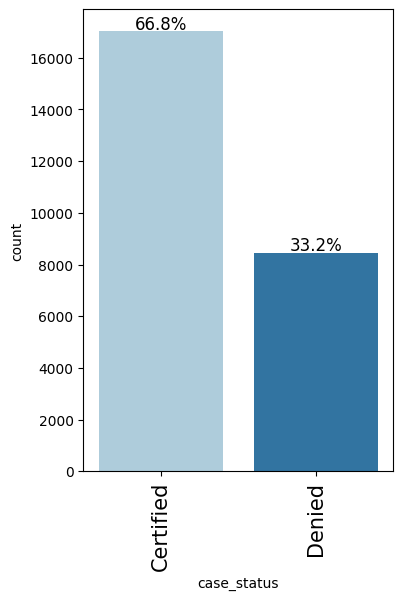

Certified    17018
Denied        8462
Name: case_status, dtype: int64

In [ ]:
labeled_barplot(data, 'case_status', perc=True)
data['case_status'].value_counts()

- Approximately 2/3 of applicants were given a Visa certification, while a 1/3 was denied

### Bivariate Data Analysis

#### Functions to Help with Bivariate Analysis

In [ ]:
#function to create stacked bar plots

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))

In [ ]:
# function to plot distributions wrt target

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

#### Heatmap of Numerical Columns

In [ ]:
# Creating a list of numerical columns
num_cols = data.select_dtypes(include=np.number).columns.tolist()
num_cols

['no_of_employees', 'yr_of_estab', 'prevailing_wage']

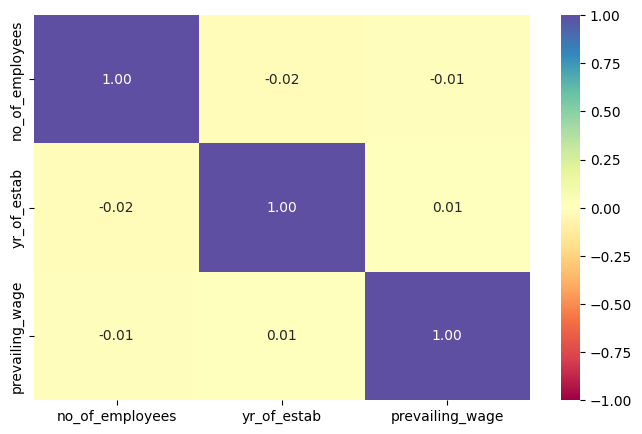

In [ ]:
#Creating heatmap of numerical data
plt.figure(figsize=(8, 5))
sns.heatmap(data[num_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral");

- There doesn't seem to be any linear correlation with the numerical variables

#### Comparing Case Status (target variable) with other variables

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


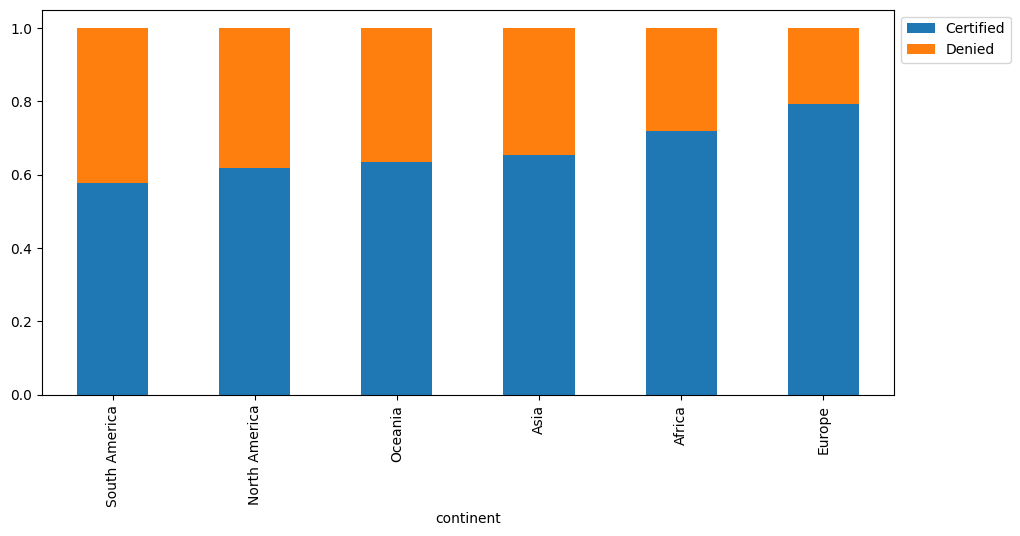

In [ ]:
# Case status vs Continent
stacked_barplot(data, 'continent', 'case_status')

- Certified rate: Europe ~79%, Africa ~72%, Asia ~65%, Oceania ~63%, North America ~62%,  South America ~59%

- Europe has the highest percent rate of certification followed by Africa
- South America has the lowest percent rate certification followed by North America

**Question 2**
- Europe has the highest percent rate of certification followed by Africa; while South America has the lowest percent rate certification.

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


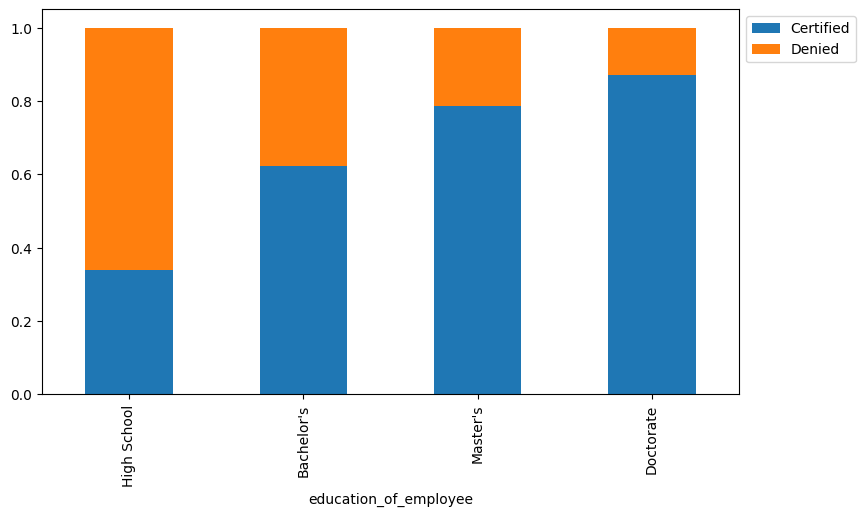

In [ ]:
# Case status vs Education
stacked_barplot(data, 'education_of_employee', 'case_status')

- Doctorate has the highest certification
- High School has the lowest certification, and it is about half the rate of a bachlor's degree.
- This makes sense, because countries want to take in highly educated employees to help thier businesses/economy.

**Question 1**
- It does appear education plays a pivitol role in determining certification.  The more education the greater the chance of getting your Visa Certified.  

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


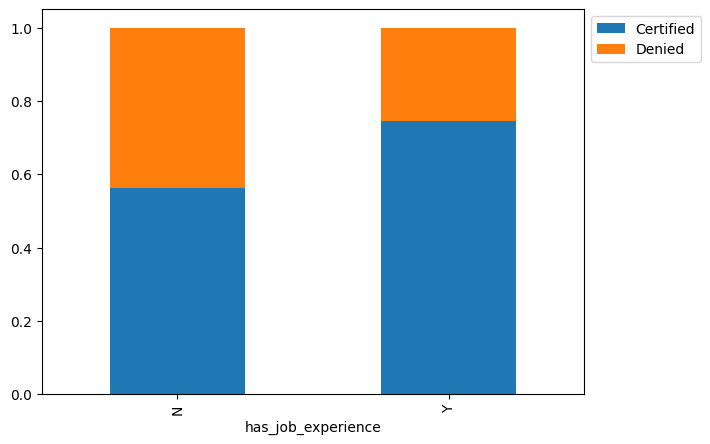

In [ ]:
# Case status vs Job Experience
stacked_barplot(data, 'has_job_experience', 'case_status')

- Has had job experience has a greater certification rate than no job experience (approx. 20% difference)

**Question 3**
- It does appear work experience does influence Visa status.  Employees with job experience appear to get certified about 20% more than non-experienced employees.

case_status            Certified  Denied    All
requires_job_training                          
All                        17018    8462  25480
N                          15012    7513  22525
Y                           2006     949   2955
------------------------------------------------------------------------------------------------------------------------


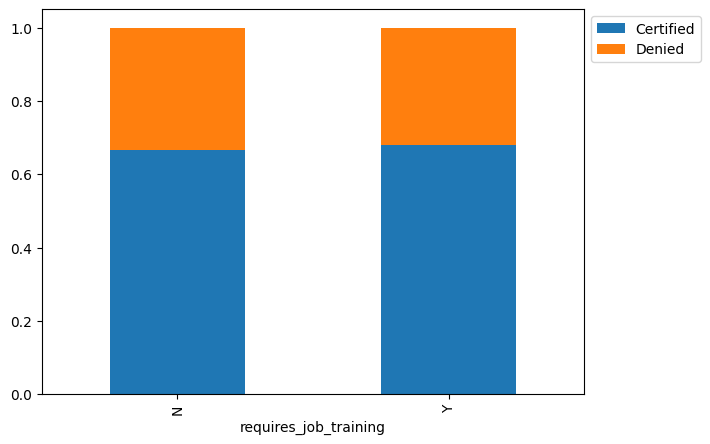

In [ ]:
# Case status vs Requires Job Training
stacked_barplot(data, 'requires_job_training', 'case_status')

- Requires job training doesn't seem to have an impact on certification (they are approx. equal)

case_status           Certified  Denied    All
region_of_employment                          
All                       17018    8462  25480
Northeast                  4526    2669   7195
West                       4100    2486   6586
South                      4913    2104   7017
Midwest                    3253    1054   4307
Island                      226     149    375
------------------------------------------------------------------------------------------------------------------------


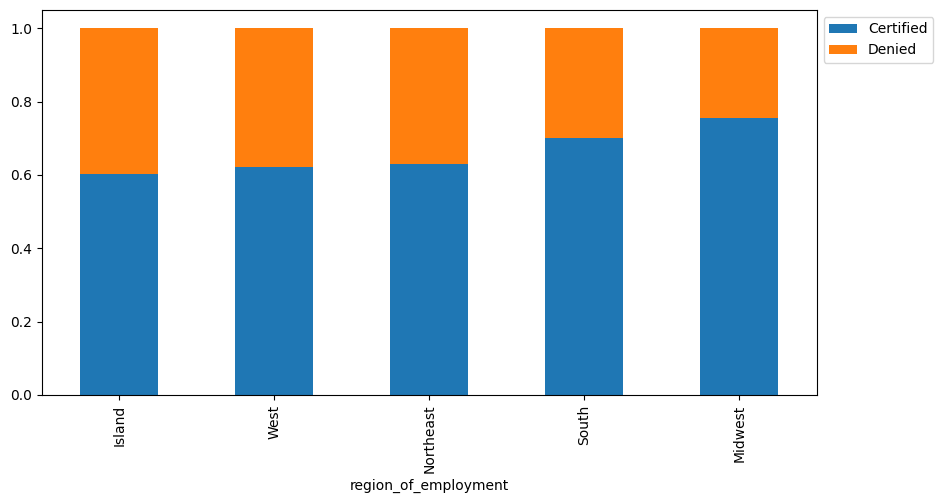

In [ ]:
# Case status vs Region of Employment
stacked_barplot(data, 'region_of_employment', 'case_status')

- Midwest has the highest certification rate, while the Island region has the lowest

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


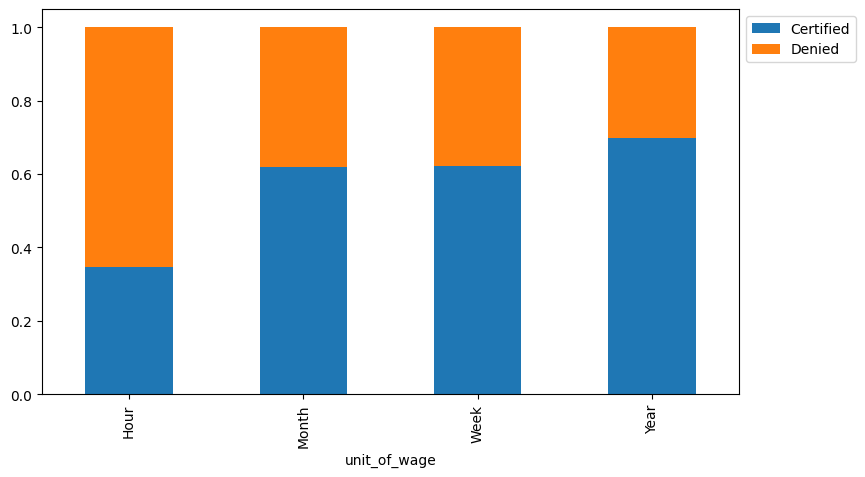

In [ ]:
# Case status vs Unit of Wage
stacked_barplot(data, 'unit_of_wage','case_status')

- Year unit of wage has the greatest certification rate, while hourly has the lowest.  
- This makes sense because if you are a good employee they want to have you for longterm rather than on a short term basis.

**Question 4**
- Year unit of pay is the most likely to be certified for a Visa.  Monthly and Weekly are about equivalent, while Hourly is less than half of any of the other pay units.

case_status         Certified  Denied    All
full_time_position                          
All                     17018    8462  25480
Y                       15163    7610  22773
N                        1855     852   2707
------------------------------------------------------------------------------------------------------------------------


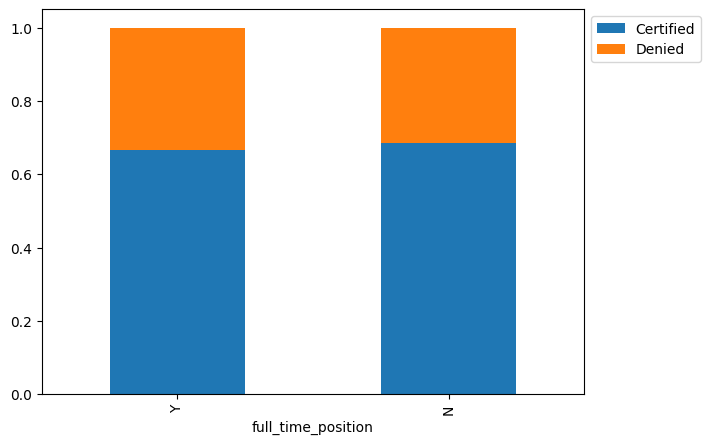

In [ ]:
# Case status vs Full-Time
stacked_barplot(data, 'full_time_position','case_status')

- Full-time position doesn't seem to make much difference on certification (certification rate is about the same)

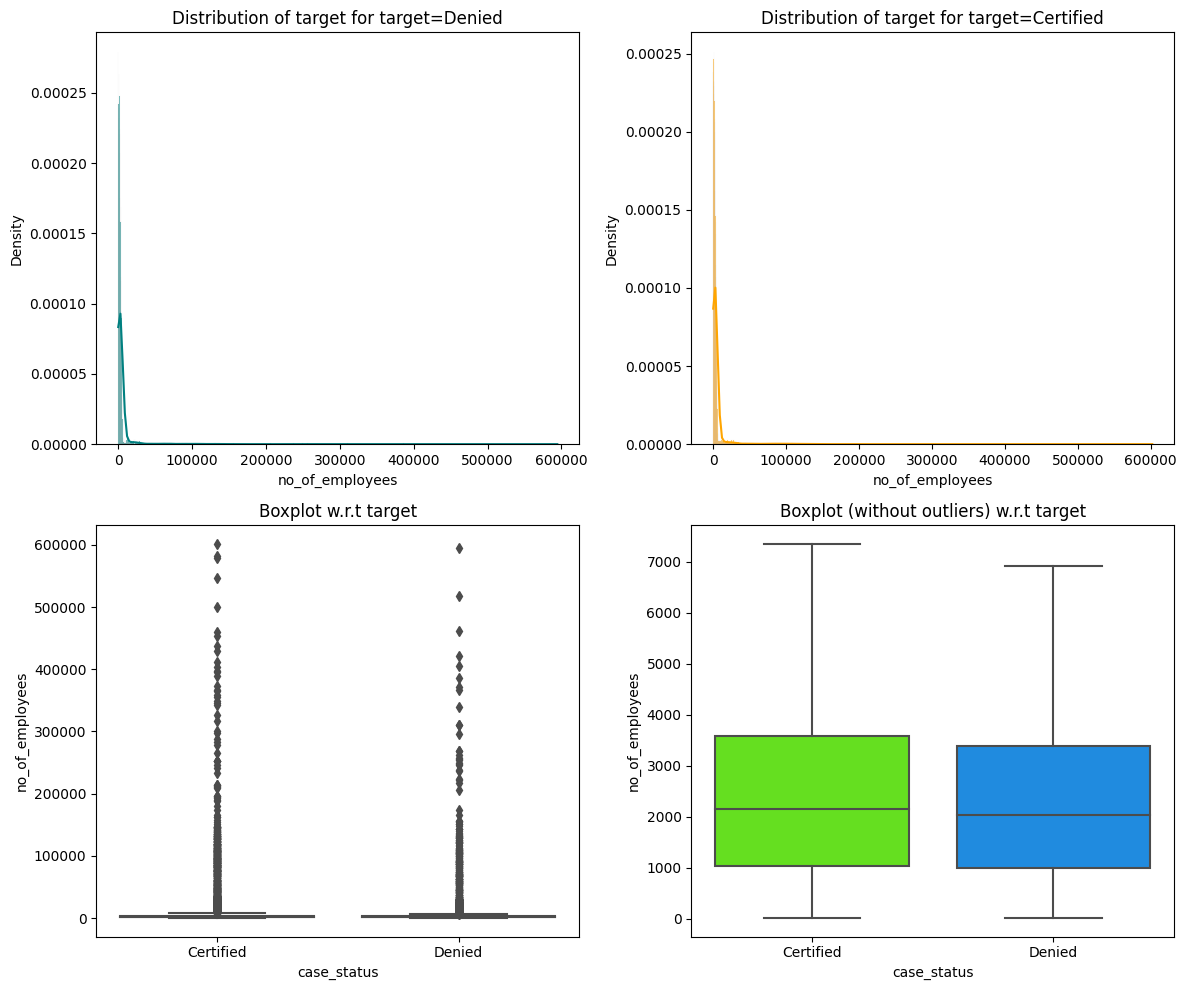

In [ ]:
# Case status vs Number of Employees
distribution_plot_wrt_target(data, 'no_of_employees', 'case_status')

- Denied status has less employees based on the median, but both are right skewed and have several outliers

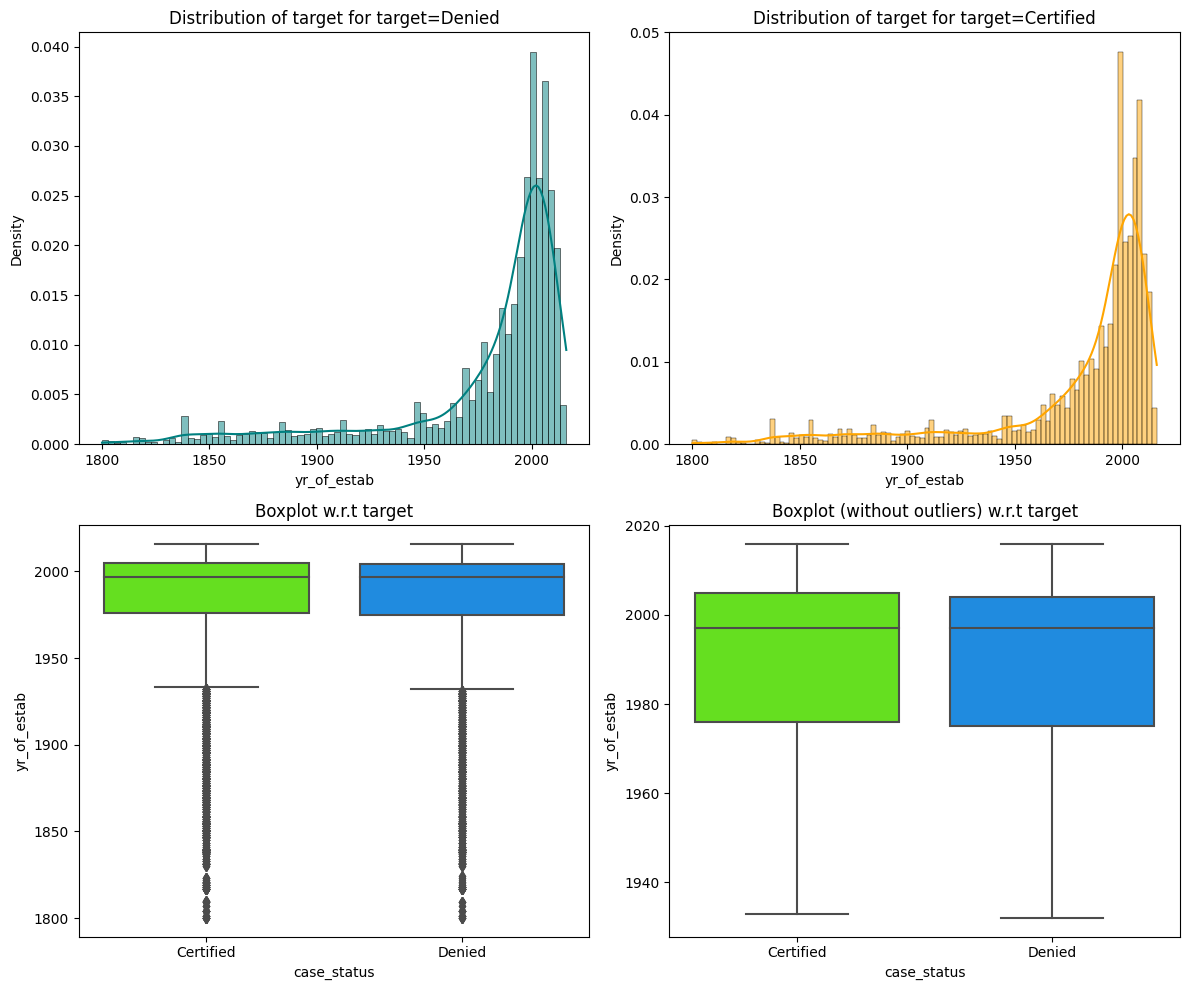

In [ ]:
# Case status vs Company Establishment Year
distribution_plot_wrt_target(data, 'yr_of_estab', 'case_status')

- The Year of establishment of the company doesn't to seem to have much say on case status.  Both have approx. same median, left skewed, and have several low outliers

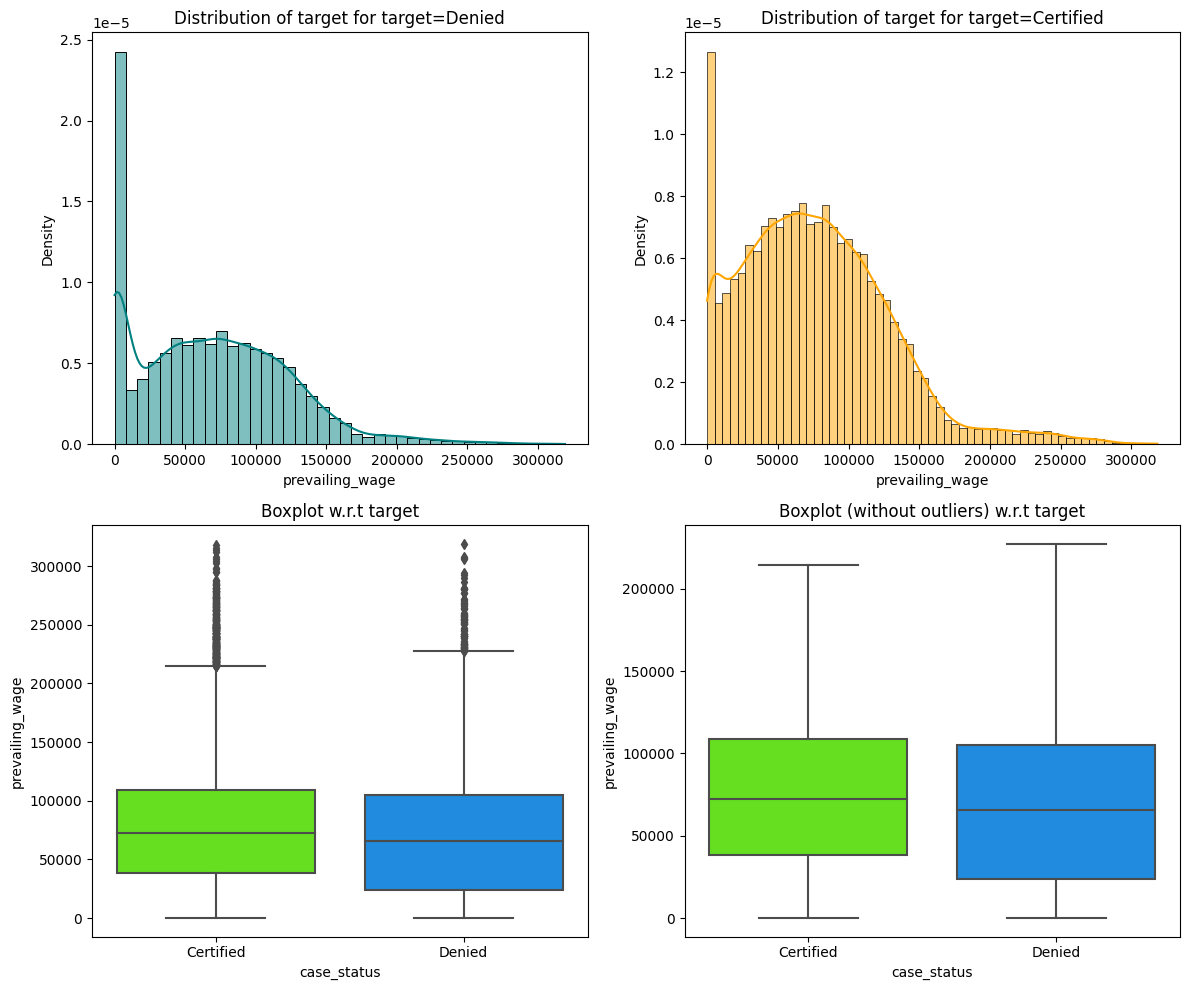

In [ ]:
# Case status vs Prevailing Wage
distribution_plot_wrt_target(data, 'prevailing_wage', 'case_status')

- Certified status has a slightly higher prevailing wage.  Both are right skewed and hve several high outliers.

**Question 5**
- Higher prevailing wage appears to lead to a slightly higher Visa certification based on the median.  

#### Comparing Continent with other variables

education_of_employee  Bachelor's  Doctorate  High School  Master's    All
continent                                                                 
All                         10234       2192         3420      9634  25480
Asia                         7168        923         2290      6480  16861
Europe                       1299        846          490      1097   3732
North America                1225        258          401      1408   3292
South America                 333         89          137       293    852
Africa                        143         54           66       288    551
Oceania                        66         22           36        68    192
------------------------------------------------------------------------------------------------------------------------


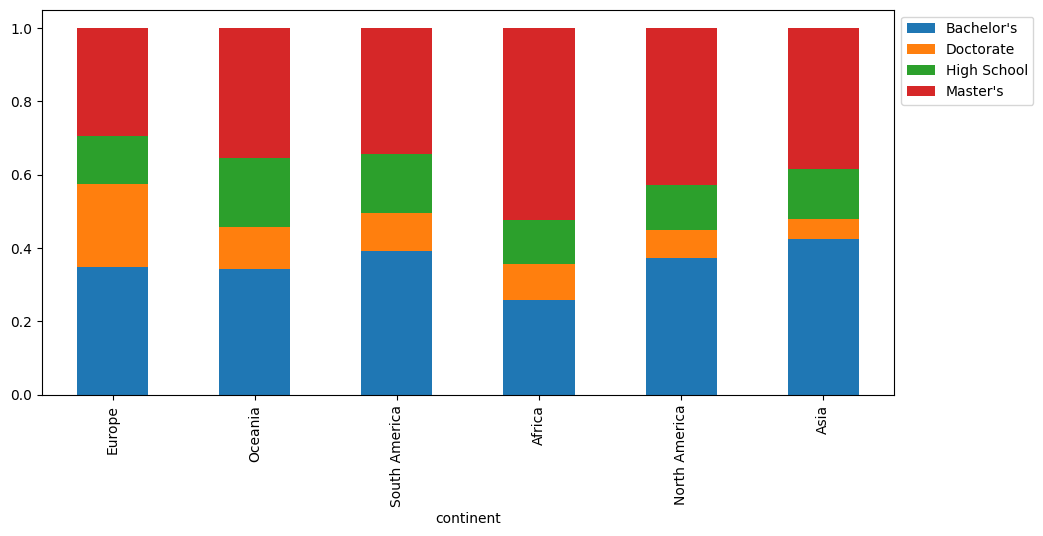

In [ ]:
# Continent with Education
stacked_barplot(data, 'continent', 'education_of_employee')

- Europe has the highest percent of Doctorate's applying for Visa
- Africa has the highest percent of Master's applying for Visa
- Asia has the highest percent of Bachelor's applying for Visa
- Oceania has the highest percent of high school applying

requires_job_training      N     Y    All
continent                                
All                    22525  2955  25480
Asia                   15113  1748  16861
Europe                  2993   739   3732
North America           3044   248   3292
South America            702   150    852
Africa                   510    41    551
Oceania                  163    29    192
------------------------------------------------------------------------------------------------------------------------


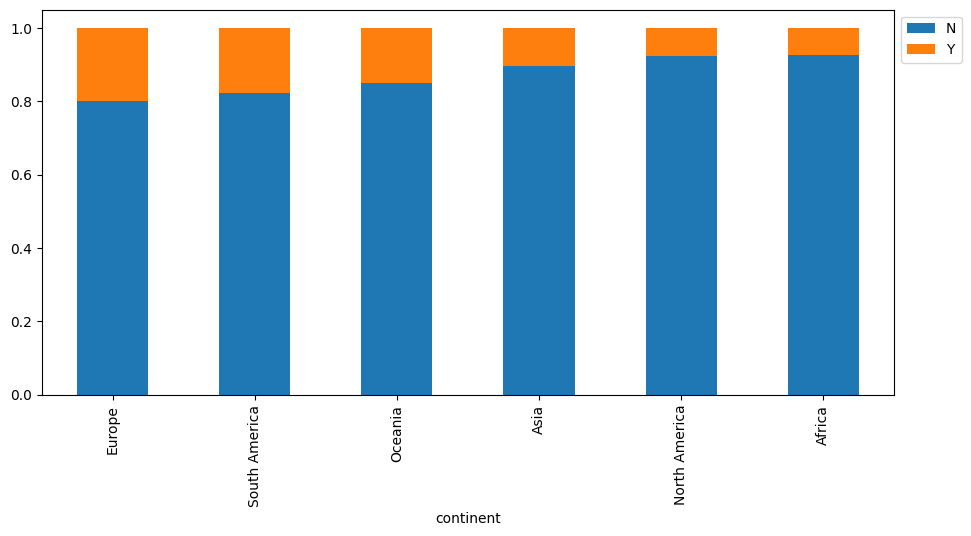

In [ ]:
# Continent vs Job Training Required
stacked_barplot(data, 'continent', 'requires_job_training')

- Europe and South America require the most job training
- Africa and North America require the least amount of job training

region_of_employment  Island  Midwest  Northeast  South  West    All
continent                                                           
All                      375     4307       7195   7017  6586  25480
Asia                     226     3371       4589   4805  3870  16861
North America             82      392       1114    870   834   3292
Europe                    32      303        965    973  1459   3732
South America             23      111        266    223   229    852
Africa                     8       92        212    102   137    551
Oceania                    4       38         49     44    57    192
------------------------------------------------------------------------------------------------------------------------


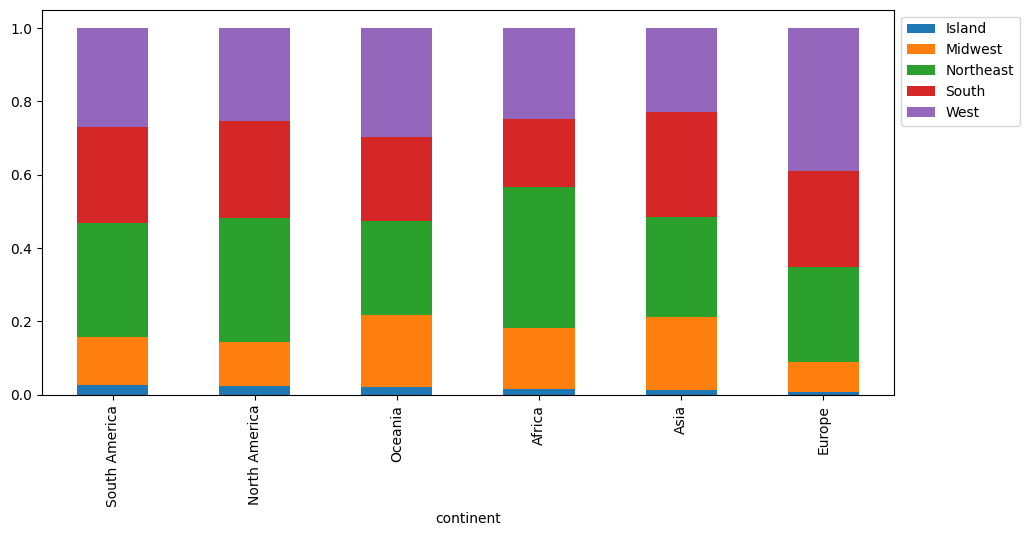

In [ ]:
# Continent vs Region of Employment
stacked_barplot(data, 'continent', 'region_of_employment')

- Europe applies the most percent for employment in the West region
- Africa applies the most percent for employment in the Northeast region


unit_of_wage   Hour  Month  Week   Year    All
continent                                     
All            2157     89   272  22962  25480
Asia           1311     58   154  15338  16861
North America   495     17    75   2705   3292
Europe          140      7    17   3568   3732
Africa           36      3     8    504    551
Oceania          18      2     4    168    192
South America   157      2    14    679    852
------------------------------------------------------------------------------------------------------------------------


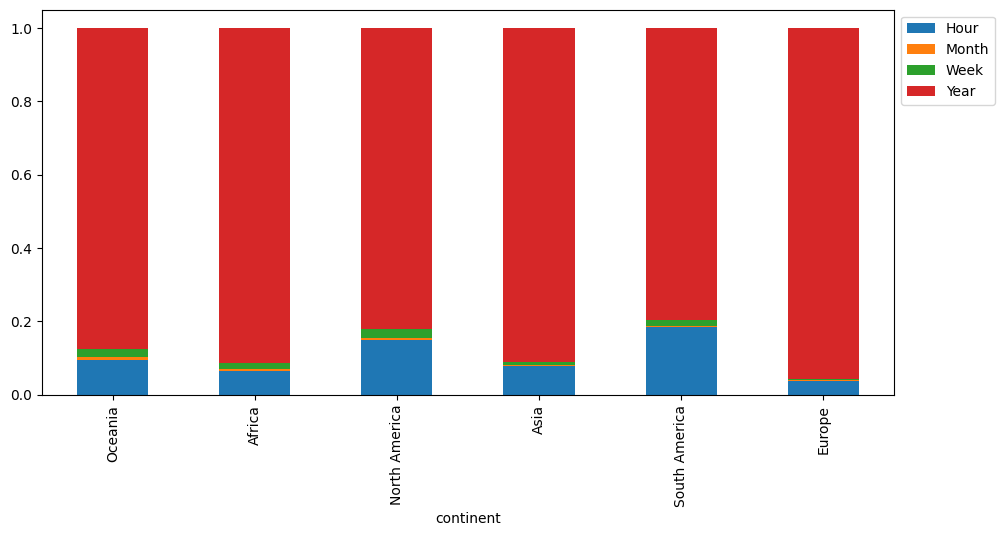

In [ ]:
# Continent vs Unit of Wage
stacked_barplot(data, 'continent', 'unit_of_wage')

- Europe prefers yearly wage the highest
- South America prefers hourly wage the most

full_time_position     N      Y    All
continent                             
All                 2707  22773  25480
Asia                1941  14920  16861
North America        571   2721   3292
Europe               115   3617   3732
Africa                31    520    551
South America         31    821    852
Oceania               18    174    192
------------------------------------------------------------------------------------------------------------------------


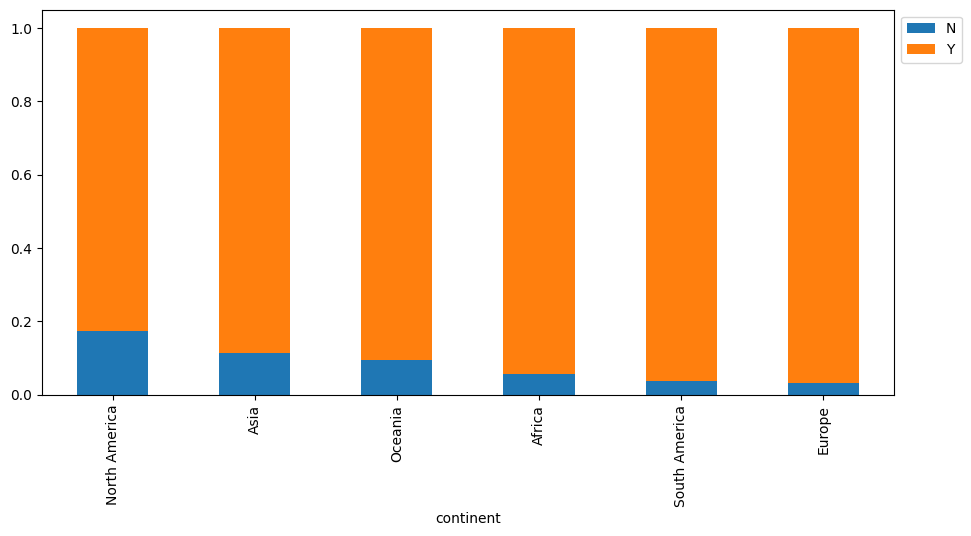

In [ ]:
# Continent vs Full-time Position
stacked_barplot(data, 'continent', 'full_time_position')

- North America has the highest percent of non-full time positions
- Europe has the highest percent of full-time positions

#### Comparing Education with other variables

has_job_experience         N      Y    All
education_of_employee                     
All                    10678  14802  25480
Bachelor's              4348   5886  10234
Master's                3993   5641   9634
High School             1396   2024   3420
Doctorate                941   1251   2192
------------------------------------------------------------------------------------------------------------------------


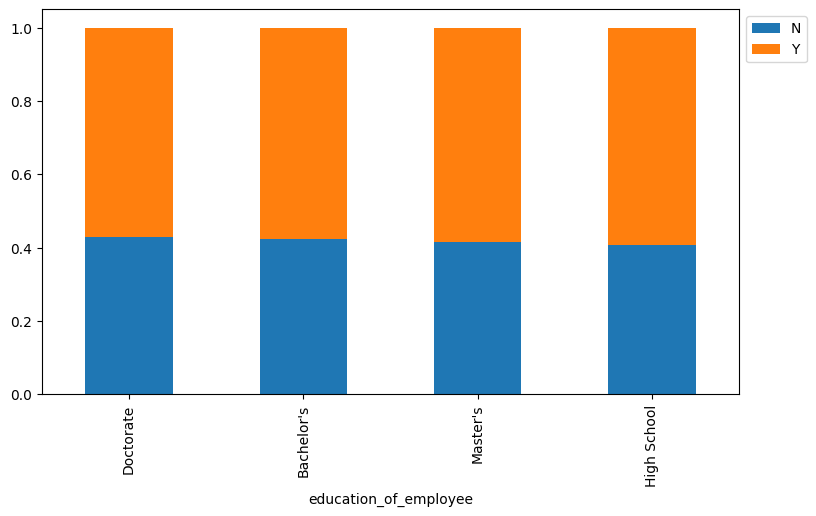

In [ ]:
# Education vs job experience
stacked_barplot(data, 'education_of_employee', 'has_job_experience')

- Job experience is about the same for all levels of education.  Higher education is slightly more job experience.

requires_job_training      N     Y    All
education_of_employee                    
All                    22525  2955  25480
Bachelor's              8971  1263  10234
Master's                8786   848   9634
High School             2990   430   3420
Doctorate               1778   414   2192
------------------------------------------------------------------------------------------------------------------------


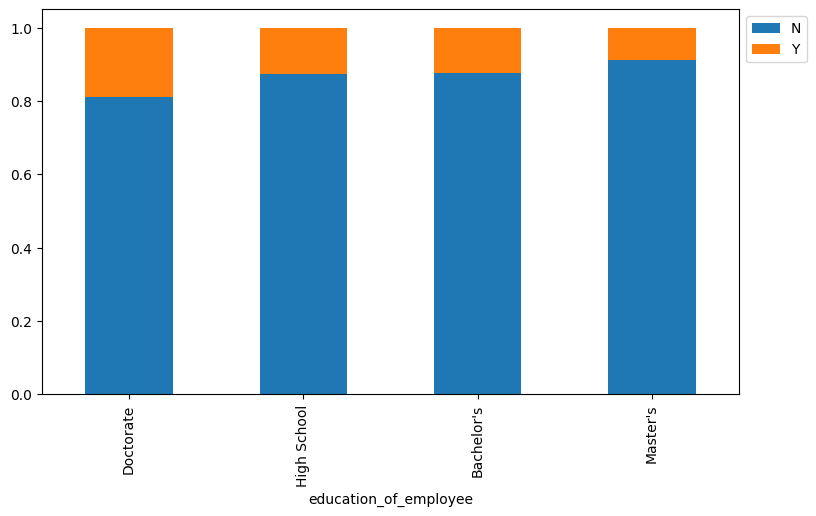

In [ ]:
# Education vs Requires Job Training
stacked_barplot(data, 'education_of_employee', 'requires_job_training')

- Interestig that Doctorate percentile wise needs the most job training, but this could be because they were in school longer which allowed for less time gaining job experience.  

education_of_employee  Bachelor's  Doctorate  High School  Master's    All
region_of_employment                                                      
All                         10234       2192         3420      9634  25480
West                         2925        714          785      2162   6586
Northeast                    2874        656          905      2760   7195
South                        2991        541          934      2551   7017
Midwest                      1315        256          736      2000   4307
Island                        129         25           60       161    375
------------------------------------------------------------------------------------------------------------------------


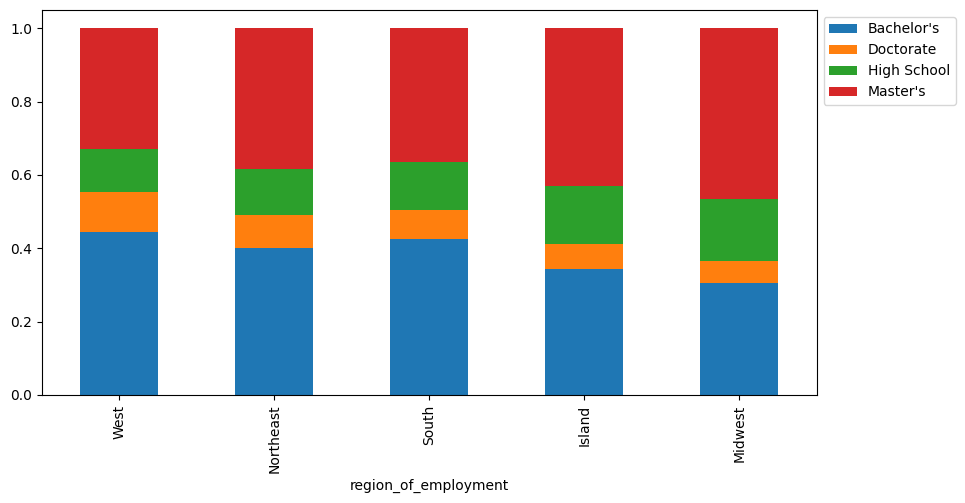

In [ ]:
# Education vs Region of Employment
stacked_barplot(data, 'region_of_employment', 'education_of_employee')

- Midwest obtains the highest percent of Master's and highest percent of high school
- West obtains the highest percent of Doctorate's

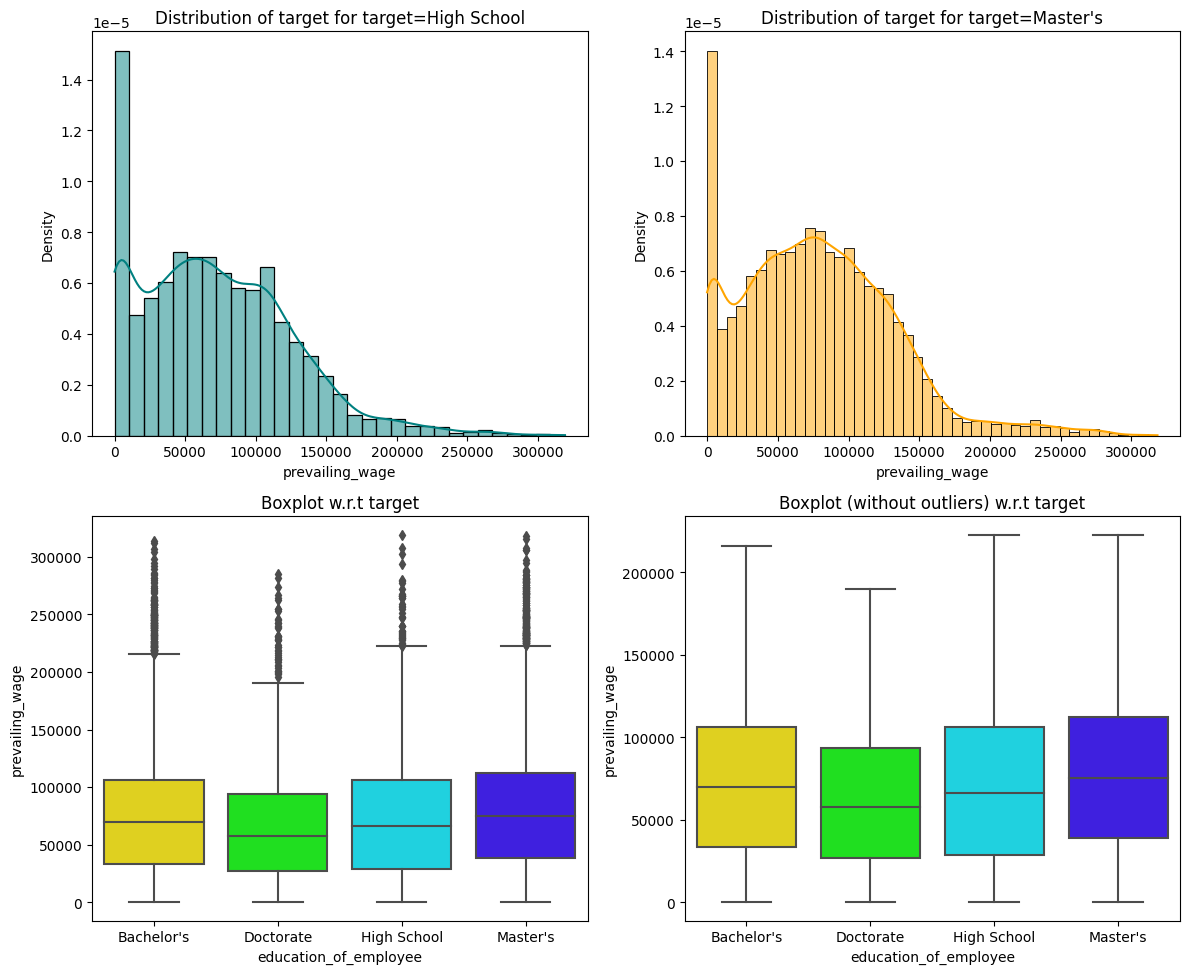

In [ ]:
#Education vs Prevailing Wage
distribution_plot_wrt_target(data, 'prevailing_wage', 'education_of_employee')

- Interesting doctorate has the lowest median of prevailing wage, usually higher education equals higher wage.  This could be because they are more reearch based which is academia which doesn't usually get paid well.
- Bachelor's and Master's are about euivalent

full_time_position        N      Y    All
education_of_employee                    
All                    2707  22773  25480
Master's               1738   7896   9634
Bachelor's              683   9551  10234
High School             206   3214   3420
Doctorate                80   2112   2192
------------------------------------------------------------------------------------------------------------------------


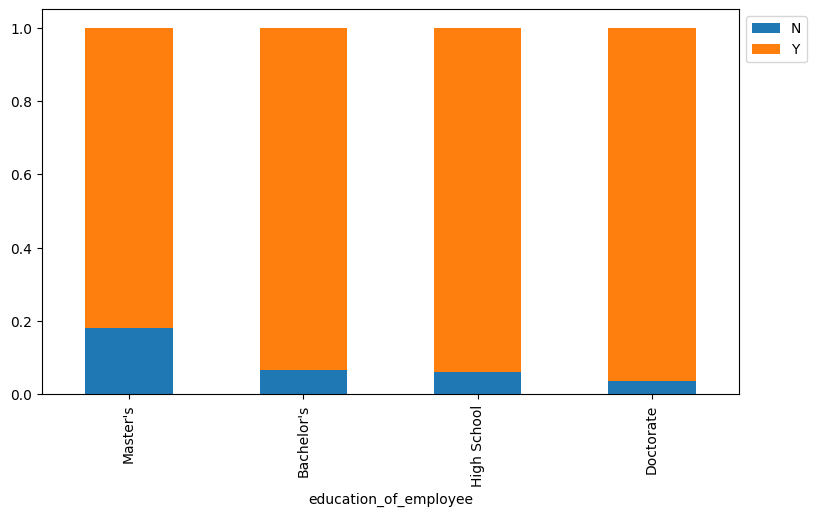

In [ ]:
# Education vs Full Time Position
stacked_barplot(data, 'education_of_employee', 'full_time_position')

- Doctorate requires the highest percent of full time, while Master's requires the least

unit_of_wage           Hour  Month  Week   Year    All
education_of_employee                                 
All                    2157     89   272  22962  25480
Bachelor's              981     41   126   9086  10234
Master's                685     30   106   8813   9634
High School             395     13    32   2980   3420
Doctorate                96      5     8   2083   2192
------------------------------------------------------------------------------------------------------------------------


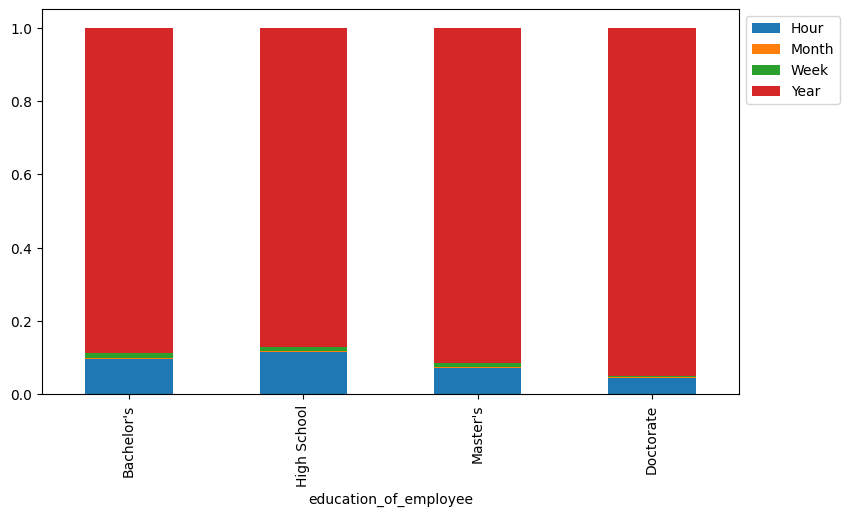

In [ ]:
# Education vs Unit of Wage
stacked_barplot(data, 'education_of_employee', 'unit_of_wage')

- High School had the highest percentage of Hourly Wage

####Comparing Unit of Wage with other variables

has_job_experience      N      Y    All
unit_of_wage                           
All                 10678  14802  25480
Year                 9208  13754  22962
Hour                 1365    792   2157
Week                   73    199    272
Month                  32     57     89
------------------------------------------------------------------------------------------------------------------------


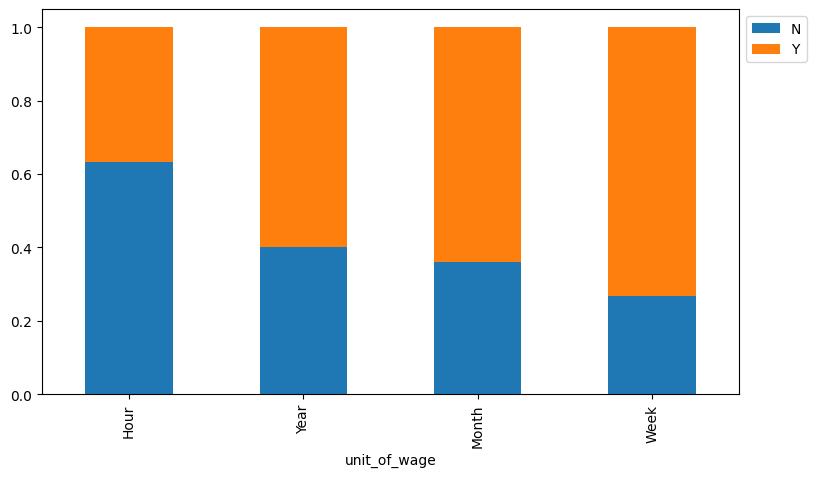

In [ ]:
#Unit of Wage with Job Experience
stacked_barplot(data, 'unit_of_wage', 'has_job_experience')

- Hourly wage has the least work expierence

unit_of_wage          Hour  Month  Week   Year    All
region_of_employment                                 
All                   2157     89   272  22962  25480
Northeast              865     29    92   6209   7195
South                  696     28    68   6225   7017
West                   432     19    77   6058   6586
Midwest                146     13    32   4116   4307
Island                  18      0     3    354    375
------------------------------------------------------------------------------------------------------------------------


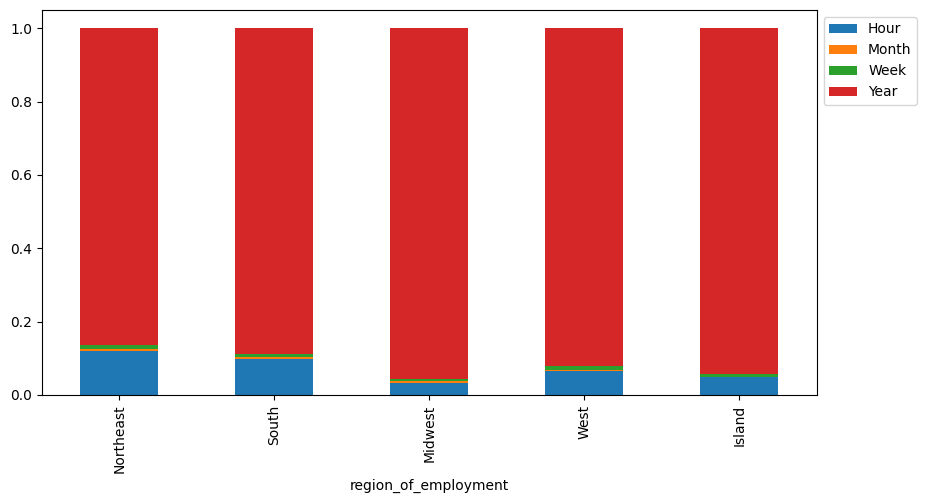

In [ ]:
#Unit of Wage with Region of Employment
stacked_barplot(data, 'region_of_employment', 'unit_of_wage')

- All regions have year as the highest unit of measure
- Northeast has the highest percent of hourly

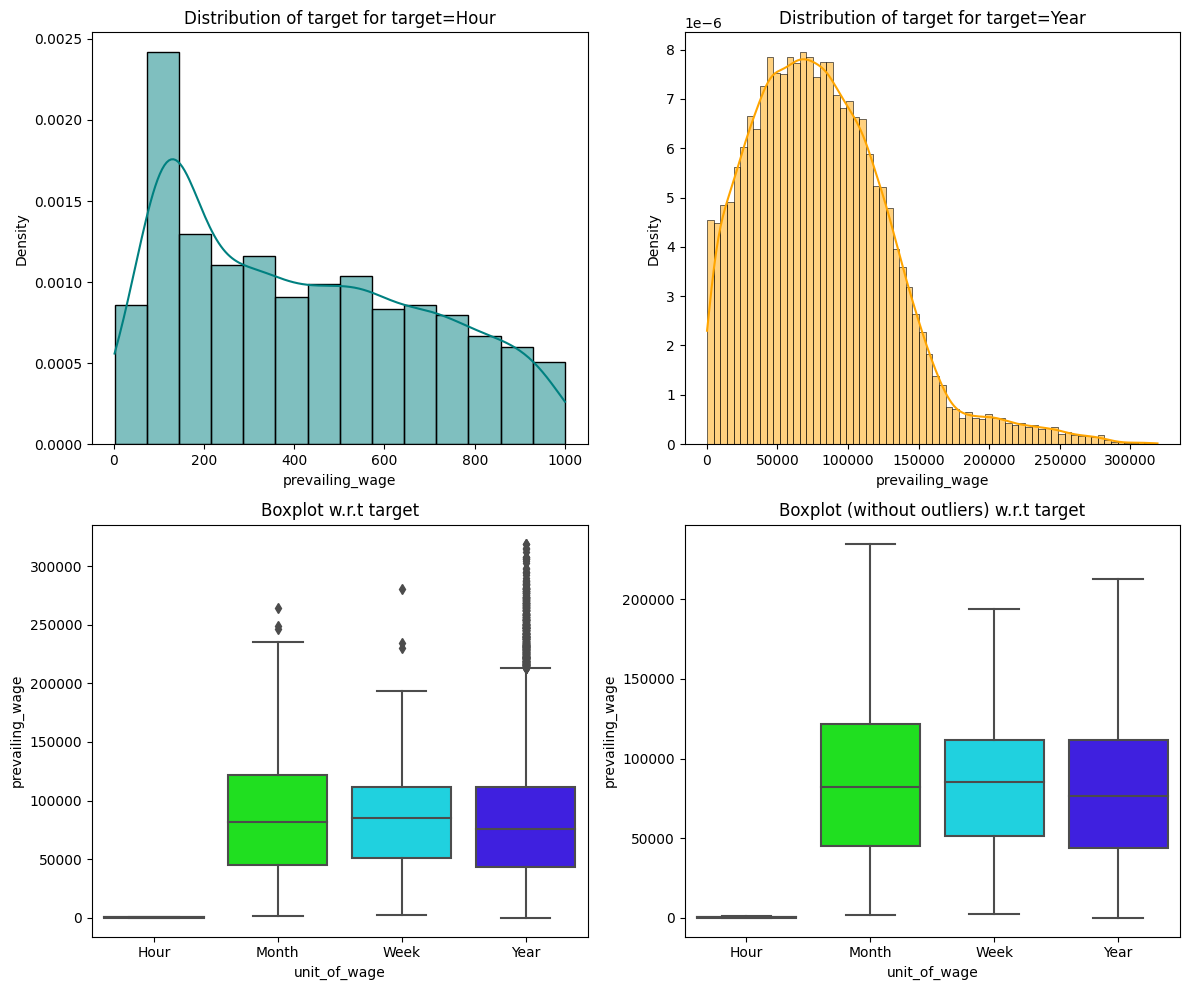

In [ ]:
#Unit of Wage vs Prevailing Wage
distribution_plot_wrt_target(data, 'prevailing_wage', 'unit_of_wage')

- Hourly by far has the lowest prevailing wage, while the other three are all similar

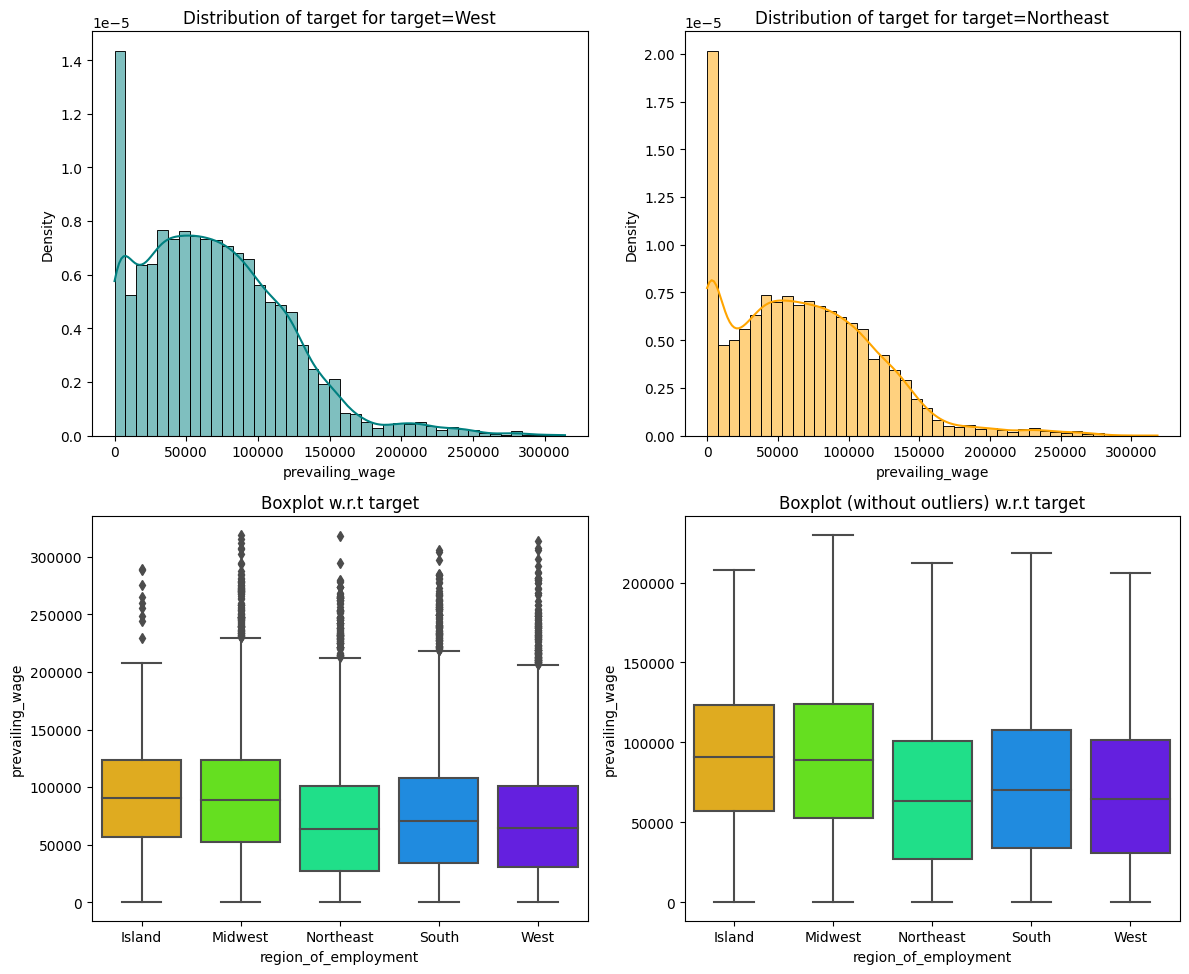

In [ ]:
#Region vs Prevailing Wage
distribution_plot_wrt_target(data, 'prevailing_wage', 'region_of_employment')

- Northeast and West regions have the lowest median prevailing wage, while Island and Midwest have the highest

## Data Preprocessing

### Outlier Detection

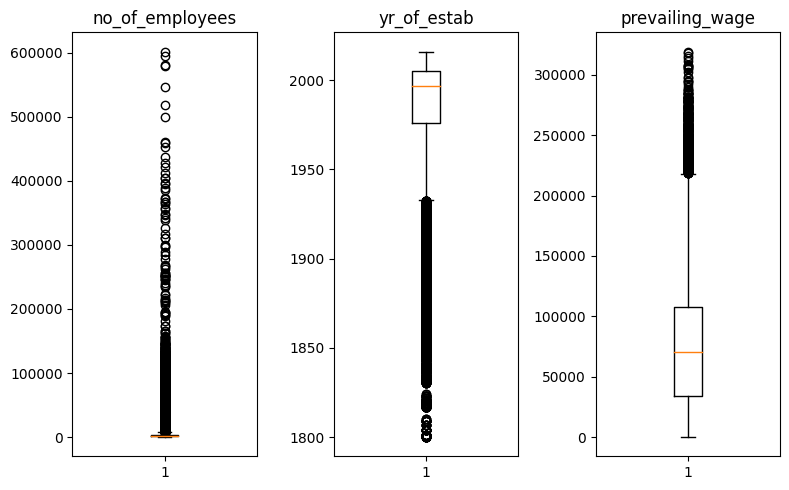

In [ ]:
# outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(8, 5))

for i, variable in enumerate(numeric_columns):
    plt.subplot(1, 3, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

Observations
- There are quite a few outliers in the data; however, we will not treat them as they are proper values

###Encoding Certified Status as 1 and Denied Status as 0.

In [ ]:
data['case_status'] = data['case_status'].apply(lambda x: 1 if x == 'Certified' else 0)

#checking to make sure it encoded properly
data.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,0
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,1
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,0
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,0
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,1


In [ ]:
# specifying the independent and dependent variables
X = data.drop(["case_status"], axis=1)
Y = data["case_status"]

# creating dummy variables
X = pd.get_dummies(X, drop_first=True)

# splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

In [ ]:
# Checking the data to see
  # -created dummy variables
    # - kept all numeric variables
X.head()

,no_of_employees,yr_of_estab,prevailing_wage,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America,education_of_employee_Doctorate,education_of_employee_High School,...,has_job_experience_Y,requires_job_training_Y,region_of_employment_Midwest,region_of_employment_Northeast,region_of_employment_South,region_of_employment_West,unit_of_wage_Month,unit_of_wage_Week,unit_of_wage_Year,full_time_position_Y
0,14513,2007,592.2029,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
1,2412,2002,83425.6500,1,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,1
2,44444,2008,122996.8600,1,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,1
3,98,1897,83434.0300,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1
4,1082,2005,149907.3900,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,1


In [ ]:
# Making sure there are the same number of columns in test and training sets and looking at percentages in each
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (17836, 21)
Shape of test set :  (7644, 21)
Percentage of classes in training set:
1    0.663602
0    0.336398
Name: case_status, dtype: float64
Percentage of classes in test set:
1    0.677917
0    0.322083
Name: case_status, dtype: float64


- From all the data we saw certified(class 1) was ~67% and denied(class 0) was ~33%.  The split between training and test data preserved these percentages relatively well.

## Model Evaluation Criterion

**Model can make wrong predictions as**:

1. Predicting a Visa application will be Certified but in reality the application would be Denied and the cadidate would not be able to work in the US legally. (False Positive)

2. Predicting a Visa application will be Denied but in reality the application would be Certified and the candidate would be able to work in the US legally. (False Negative)

**Which case is more important?**

* Both the cases are important as:

  * If an application is Certified when it should have been Denied, then this causes a US citizen an opportunity to get hired in this position because it was granted to a foreigner.

  * If an application is Denied when it should have been Certified, then this causes the US economy to miss out on aquiring an individual who would add value to the economy and help it grow.


**How to reduce this loss?**

* We need to reduce both False Negatives and False Positives

* `f1_score` should be maximized as the greater the f1_score, the higher the chances of reducing both False Negatives and False Positives and identifying both the classes correctly
  * fi_score is computed as
  $$f1\_score = \frac{2 * Precision * Recall}{Precision + Recall}$$

**First, let's define a function to provide metric scores on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**
- The model_performance_classification_statsmodels function will be used to check the model performance of models.
- The confusion_matrix_statsmodels function will be used to plot confusion matrix.

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

# Models to find the Best F1-score
- We will go through several types of models, and make observations on each, trying to find the best model to give us the best Performce F1-score on our testing set.

## Decision Tree - Model Building and Hyperparameter Tuning

### Decision Tree

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Testing performance:
    Accuracy    Recall  Precision        F1
0   0.66405  0.742184   0.757385  0.749708


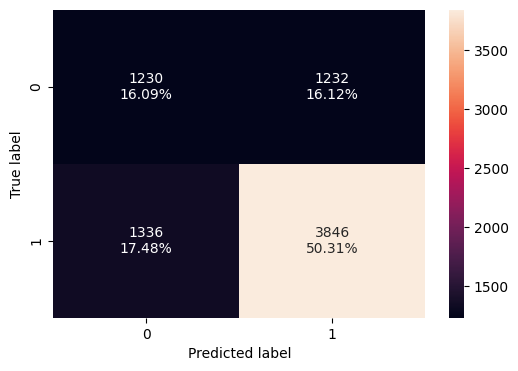

In [ ]:
#Fitting the model
d_tree = DecisionTreeClassifier(random_state=1)
d_tree.fit(X_train,y_train)

#Calculating different metrics
d_tree_model_train_perf=model_performance_classification_sklearn(d_tree,X_train,y_train)
print("Training performance:\n",d_tree_model_train_perf)
d_tree_model_test_perf=model_performance_classification_sklearn(d_tree,X_test,y_test)
print("Testing performance:\n",d_tree_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(d_tree,X_test,y_test)

* The decision tree is overfitting the training data, which can be seen by the descrepency between the training performance and testing perfomance being so vastly different.
* The F1 score on the test set is ~75%
* Let's try hyperparameter tuning to see if the model performance improves on the testing set and overfitting is reduced.

### Hyperparameter Tuning

In [ ]:
#Choose the type of classifier.
dtree_estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2, 19, 3),
              'min_samples_leaf': [1, 2, 5, 7, 10],
              'max_leaf_nodes' : [2, 3, 5, 10,15],
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=15,
                       min_impurity_decrease=0.0001, min_samples_leaf=10,
                       random_state=1)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.733068  0.911203    0.74405  0.819187
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.738095  0.906407   0.755874  0.824324


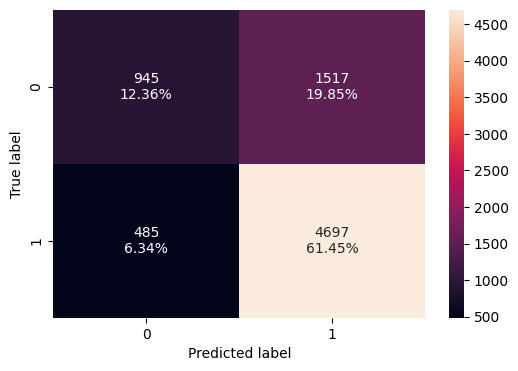

In [ ]:
#Calculating different metrics
dtree_estimator_model_train_perf=model_performance_classification_sklearn(dtree_estimator,X_train,y_train)
print("Training performance:\n",dtree_estimator_model_train_perf)
dtree_estimator_model_test_perf=model_performance_classification_sklearn(dtree_estimator,X_test,y_test)
print("Testing performance:\n",dtree_estimator_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(dtree_estimator,X_test,y_test)

* The training and testing performaces are very similar showing very little overfitting, and even performed better on the testing set.  
* The F1-score is performing well at ~82%.

**Plotting the feature importance of each variable**

In [ ]:
# Importance of features in the Decision tree building

print(pd.DataFrame(dtree_estimator.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                        Imp
education_of_employee_High School  0.377405
has_job_experience_Y               0.228069
unit_of_wage_Year                  0.091649
prevailing_wage                    0.073199
continent_Europe                   0.063205
education_of_employee_Master's     0.059783
region_of_employment_Midwest       0.047757
education_of_employee_Doctorate    0.042556
continent_North America            0.016378
region_of_employment_Northeast     0.000000
unit_of_wage_Week                  0.000000
unit_of_wage_Month                 0.000000
region_of_employment_West          0.000000
region_of_employment_South         0.000000
no_of_employees                    0.000000
requires_job_training_Y            0.000000
yr_of_estab                        0.000000
continent_South America            0.000000
continent_Oceania                  0.000000
continent_Asia                     0.000000
full_time_position_Y               0.000000


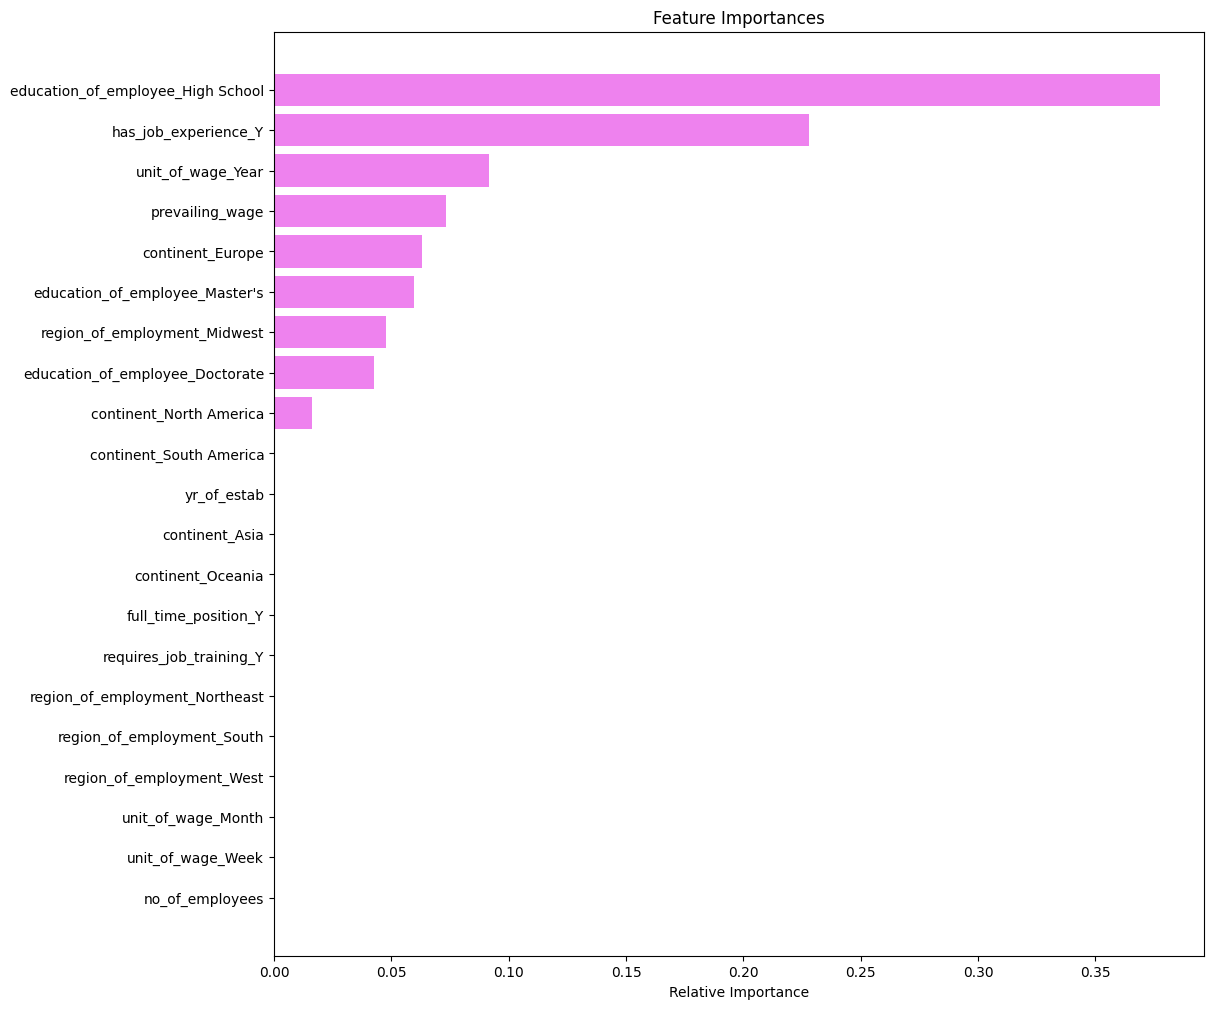

In [ ]:
feature_names = X_train.columns
importances = dtree_estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

* This decision tree's important features are if the applicant's highest form of education is high school, then has job experience, and Yearly unit of wage.  

####**Observations**
- The Decision Tree model gives an F1-score of ~82%.
- High School Education is the number one important feature, showing educational level is a big factor in decision process of recieving a VISA or not. Then having job experience and yearly unit of wage.


## Bagging - Model Building and Hyperparameter Tuning

### Bagging Classifier

   Accuracy    Recall  Precision        F1
0  0.984526  0.985468   0.991162  0.988307
   Accuracy    Recall  Precision       F1
0  0.696102  0.773061   0.777411  0.77523


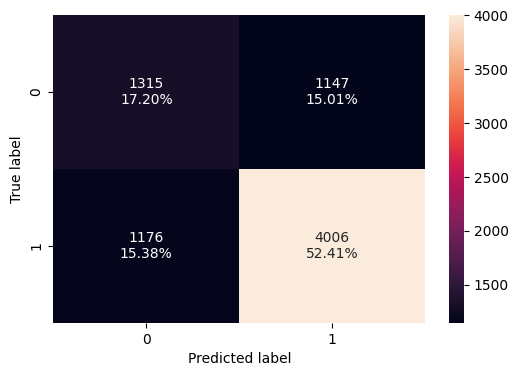

In [ ]:
#Fitting the model
bagging_classifier = BaggingClassifier(random_state=1)
bagging_classifier.fit(X_train,y_train)

#Calculating different metrics
bagging_classifier_model_train_perf=model_performance_classification_sklearn(bagging_classifier,X_train,y_train)
print(bagging_classifier_model_train_perf)
bagging_classifier_model_test_perf=model_performance_classification_sklearn(bagging_classifier,X_test,y_test)
print(bagging_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(bagging_classifier,X_test,y_test)

* Bagging classifier is overfitting to the training data set.
* The F1-score is ~77%, which is less than the hypertuned decision tree model.
* Now, let's try hyperparameter tuning to see if the model performance improves and overfitting is reduced.

### Hyperparameter Tuning

In [ ]:
# Choose the type of classifier.
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'max_samples': [0.7,0.8,0.9],
              'max_features': [0.7,0.8,0.9],
              'n_estimators' : [80, 90, 100, 110],
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.7, max_samples=0.7, n_estimators=110,
                  random_state=1)

   Accuracy    Recall  Precision        F1
0  0.996187  0.999916   0.994371  0.997135
   Accuracy    Recall  Precision        F1
0  0.733909  0.899074   0.755105  0.820825


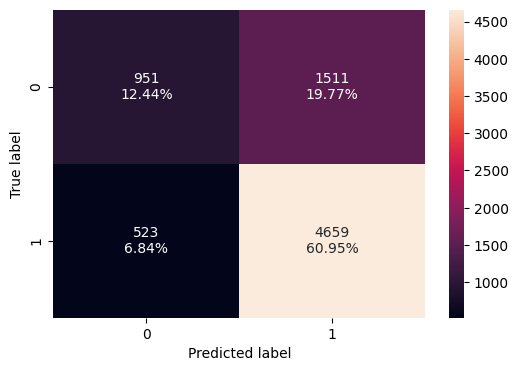

In [ ]:
#Calculating different metrics
bagging_estimator_tuned_model_train_perf=model_performance_classification_sklearn(bagging_estimator_tuned,X_train,y_train)
print(bagging_estimator_tuned_model_train_perf)
bagging_estimator_tuned_model_test_perf=model_performance_classification_sklearn(bagging_estimator_tuned,X_test,y_test)
print(bagging_estimator_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(bagging_estimator_tuned,X_test,y_test)

* Model performance has increased by about 5% to ~82% after hyperparameter tuning.
* Even after using hyperparameters with Bagging it is still overfitting to the training data set.

####**Observations**
- Bagging Classifier even with hyperparameters is overfitting the data.
- The F1-score is ~82%, which is about the same as the decision tree model with hyperparameters that had almost no overfitting.

## Random Forest Classifier - Model Building and Hyperparameter Tuning

###Random Forest

Training performance:
    Accuracy  Recall  Precision        F1
0  0.999944     1.0   0.999916  0.999958
Testing performance:
    Accuracy    Recall  Precision       F1
0  0.727368  0.833655   0.779502  0.80567


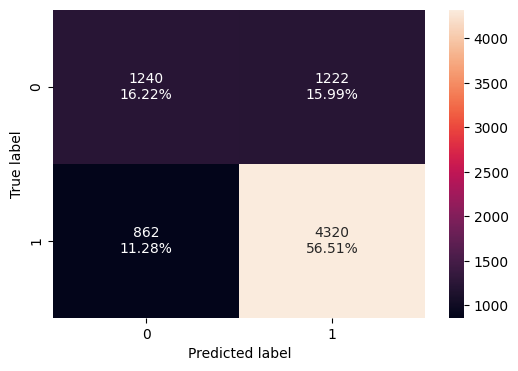

In [ ]:
#Fitting the model
rf_estimator = RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train,y_train)

#Calculating different metrics
rf_estimator_model_train_perf=model_performance_classification_sklearn(rf_estimator,X_train,y_train)
print("Training performance:\n",rf_estimator_model_train_perf)
rf_estimator_model_test_perf=model_performance_classification_sklearn(rf_estimator,X_test,y_test)
print("Testing performance:\n",rf_estimator_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(rf_estimator,X_test,y_test)

* Random forest is giving approximately the same F1-score ~81% as our hyperparameter decision tree model, but is overfitting the training data similar to the bagging model.
* Now, let's try hyperparameter tuning and see if the model performance improves and minimize the overfitting.

### Hyperparameter Tuning

In [ ]:
# Choose the type of classifier.
rf_tuned = RandomForestClassifier(random_state=1, oob_score=True, bootstrap=True)

parameters = {
                'max_depth': [6, 8, 10, None],
                'max_features': ['sqrt','log2',None],
                'min_samples_split': [5,10,2],
                'n_estimators': np.arange(30, 101, 10)}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer, cv=5,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, min_samples_split=10, n_estimators=70,
                       oob_score=True, random_state=1)

Training performance:
    Accuracy   Recall  Precision        F1
0  0.753644  0.91509   0.761674  0.831363
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.747776  0.905828   0.765243  0.829622


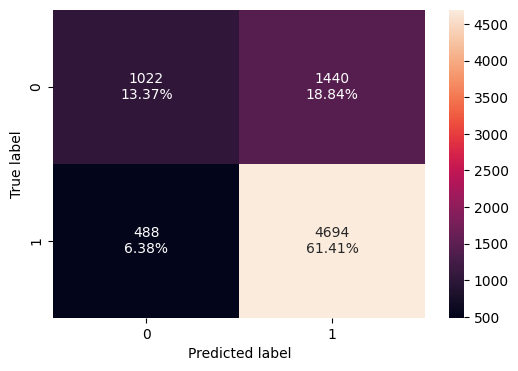

In [ ]:
#Calculating different metrics
rf_tuned_model_train_perf=model_performance_classification_sklearn(rf_tuned,X_train,y_train)
print("Training performance:\n",rf_tuned_model_train_perf)
rf_tuned_model_test_perf=model_performance_classification_sklearn(rf_tuned,X_test,y_test)
print("Testing performance:\n",rf_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(rf_tuned,X_test,y_test)

* The overfitting has significantly reduced.
* The F1-score has also slightly improved by 2% to 83%.

**Plotting the feature importance of each variable**

In [ ]:
# Importance of features in the Random Forest tree building

print(pd.DataFrame(rf_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                        Imp
education_of_employee_High School  0.264537
has_job_experience_Y               0.140549
prevailing_wage                    0.139814
education_of_employee_Master's     0.105403
unit_of_wage_Year                  0.067672
education_of_employee_Doctorate    0.048764
continent_Europe                   0.042369
no_of_employees                    0.037715
yr_of_estab                        0.030410
region_of_employment_West          0.021998
region_of_employment_Midwest       0.021517
continent_North America            0.015001
continent_Asia                     0.014064
region_of_employment_Northeast     0.010501
region_of_employment_South         0.010430
full_time_position_Y               0.008159
requires_job_training_Y            0.007952
continent_South America            0.006481
unit_of_wage_Week                  0.002863
continent_Oceania                  0.002017
unit_of_wage_Month                 0.001786


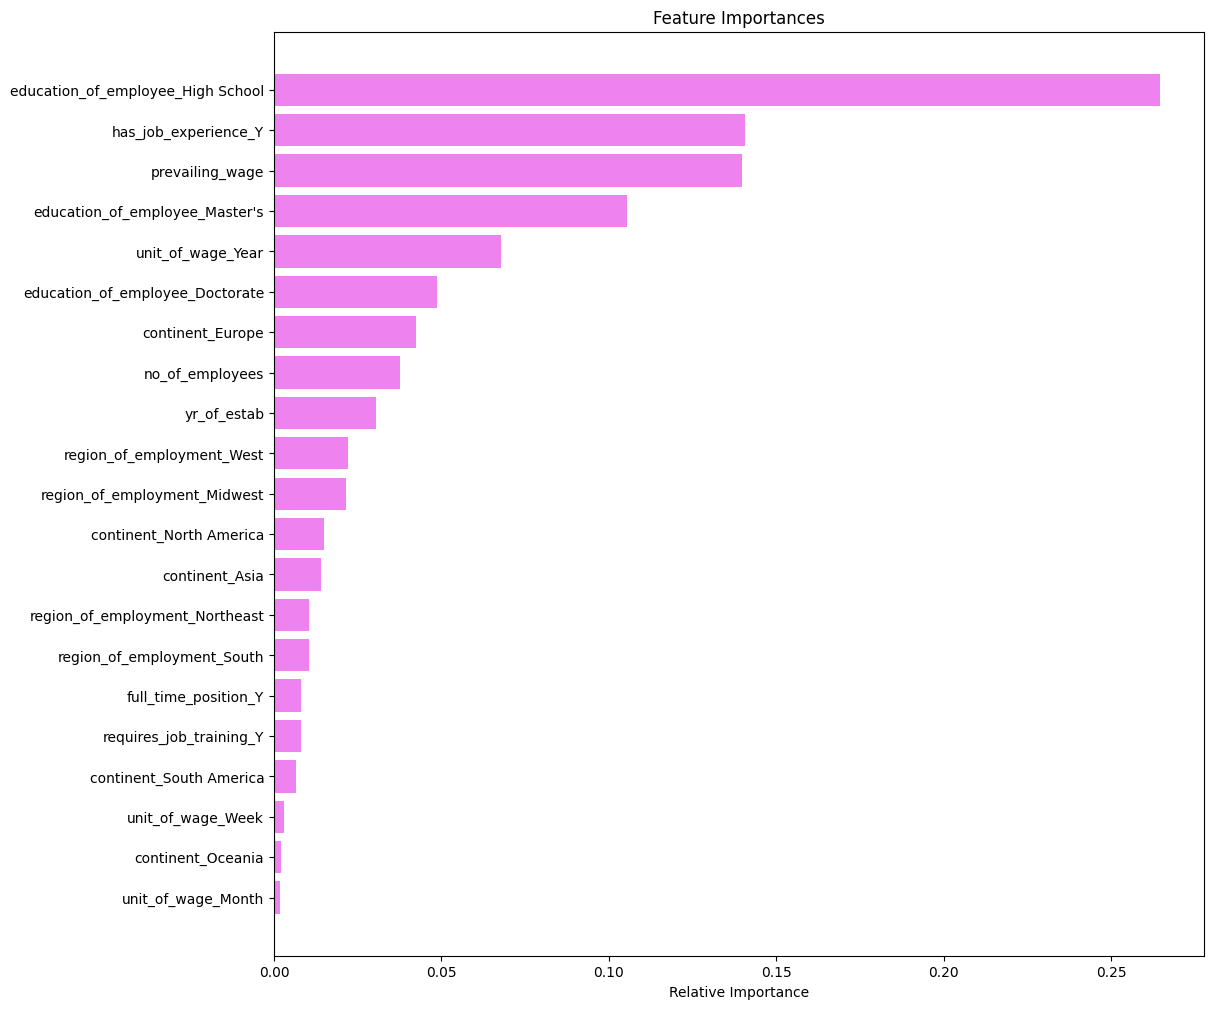

In [ ]:
feature_names = X_train.columns
importances = rf_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

* The number one feature for this Random Forest model is if the applicant's highest form of education is high school similar to the decision tree model, followed by having job experience and then prevailing wage.
* Master's and Doctorate are also within the top 6 important features.





####**Observations**
- Random Forest Model gives an F1-score of ~83% which is the highest thus far.
- After applying hyperparameters it had very minimal overfitting as well.
- High School education is still the number one important feature with job experience and prevailing wage following.   

## Boosting - Model Building and Hyperparameter Tuning

### AdaBoost Classifier

   Accuracy    Recall  Precision        F1
0  0.737441  0.885941    0.75881  0.817462
   Accuracy    Recall  Precision        F1
0  0.738488  0.885951   0.765294  0.821215


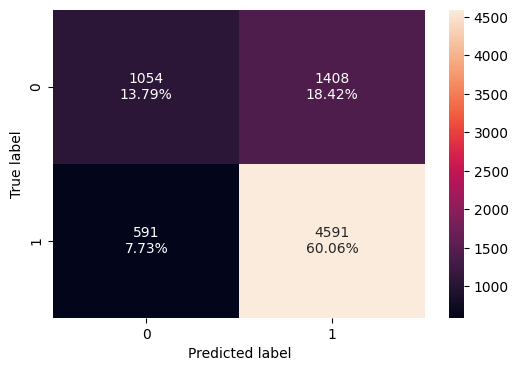

In [ ]:
#Fitting the model
ab_classifier = AdaBoostClassifier(random_state=1)
ab_classifier.fit(X_train,y_train)

#Calculating different metrics
ab_classifier_model_train_perf=model_performance_classification_sklearn(ab_classifier,X_train,y_train)
print(ab_classifier_model_train_perf)
ab_classifier_model_test_perf=model_performance_classification_sklearn(ab_classifier,X_test,y_test)
print(ab_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(ab_classifier,X_test,y_test)

* Adaboost is giving a F1-score of ~82%
* The model doesn't seem to be overfitting to the training data set.

### Hyperparameter Tuning

In [ ]:
# Choose the type of classifier.
ab_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2),
                      DecisionTreeClassifier(max_depth=3)],
    "n_estimators": np.arange(70, 111, 10),
    "learning_rate":[0.01, 0.1, 0.2, 0.3]
}

# Type of scoring used to compare parameter  combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(ab_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
ab_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
ab_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=0.1, n_estimators=70, random_state=1)

   Accuracy    Recall  Precision        F1
0  0.753308  0.877915   0.778585  0.825272
   Accuracy    Recall  Precision        F1
0  0.749215  0.871864    0.78288  0.824979


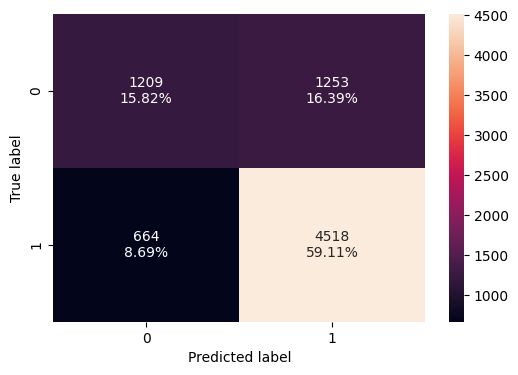

In [ ]:
#Calculating different metrics
ab_tuned_model_train_perf=model_performance_classification_sklearn(ab_tuned,X_train,y_train)
print(ab_tuned_model_train_perf)
ab_tuned_model_test_perf=model_performance_classification_sklearn(ab_tuned,X_test,y_test)
print(ab_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(ab_tuned,X_test,y_test)

* The F1-score model performance is relatively the same as before hyperparameters were introduced at ~82%.

**Plotting the feature importance of each variable**

In [ ]:
# Importance of features in the AdaBoost Model

print(pd.DataFrame(ab_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                        Imp
no_of_employees                    0.115379
education_of_employee_High School  0.113433
prevailing_wage                    0.100856
has_job_experience_Y               0.097599
education_of_employee_Master's     0.095305
education_of_employee_Doctorate    0.070344
continent_Europe                   0.063298
region_of_employment_Midwest       0.048977
region_of_employment_South         0.047266
unit_of_wage_Year                  0.042445
full_time_position_Y               0.037851
yr_of_estab                        0.035266
requires_job_training_Y            0.033490
continent_South America            0.032311
continent_North America            0.028714
region_of_employment_West          0.028139
region_of_employment_Northeast     0.006140
continent_Asia                     0.002844
continent_Oceania                  0.000342
unit_of_wage_Month                 0.000000
unit_of_wage_Week                  0.000000


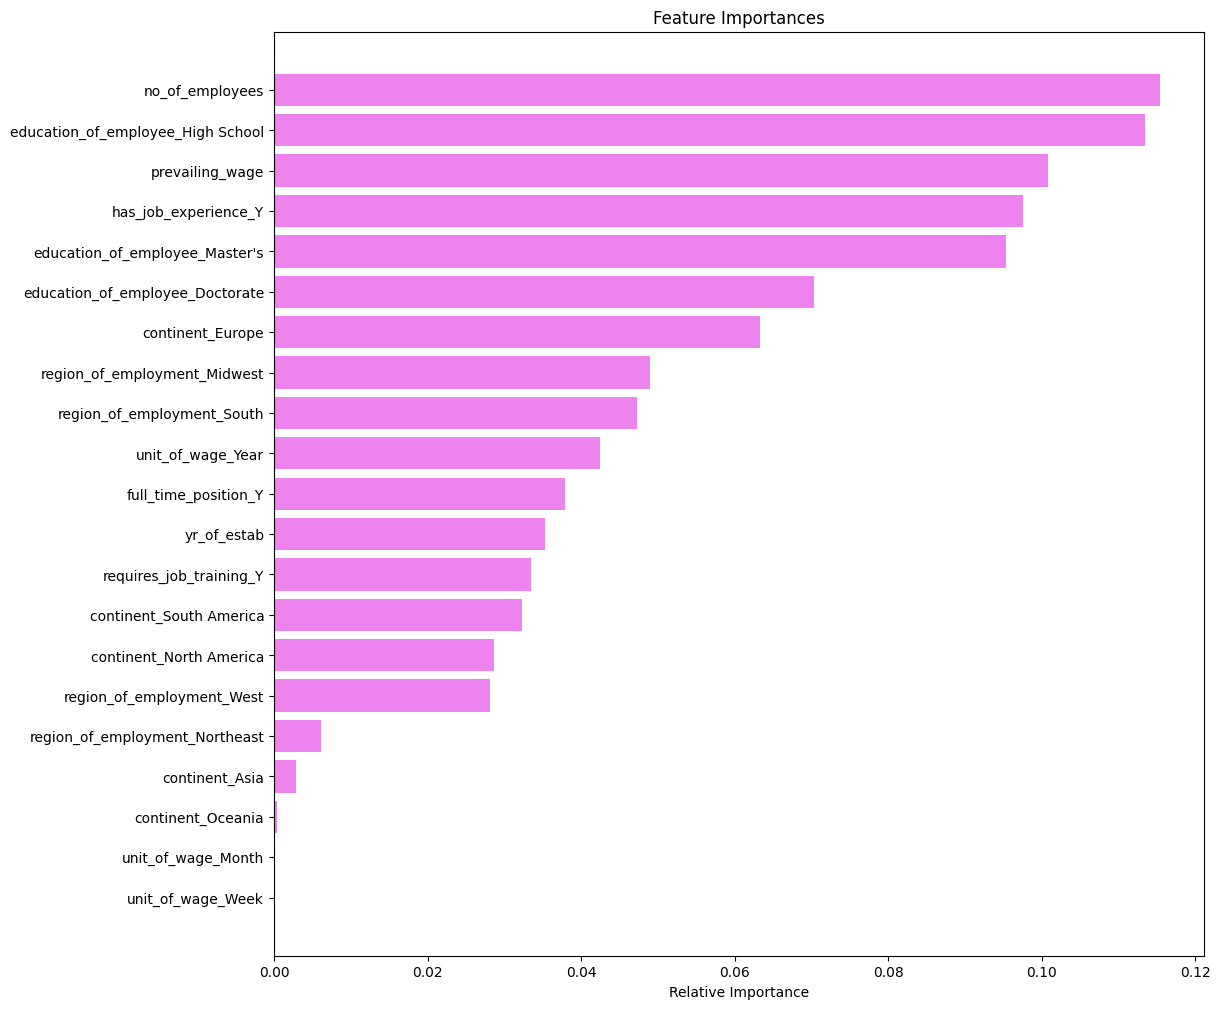

In [ ]:
feature_names = X_train.columns
importances = ab_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

* The number one feature for this AdaBoost Classifier is number of employess, which is slightly higher than high school education, followed by prevailing wage and has job experience.
* Three (high school education, prevailing wage, and has job experience) of the top four have been at the top of thus far all important features.
* Master's and Doctorate are the next two important features.

####**Observations**
- AdaBoost gives an F1-score of ~82%, and not overfitting the data.
- Number of employees was the most important feature, followed by the same three as in previous models (high school education, prevailing wage, and has job experience)

### Gradient Boosting Classifier

Training performance:
    Accuracy    Recall  Precision        F1
0  0.755607  0.876479   0.781704  0.826383
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.751308  0.870513   0.785752  0.825964


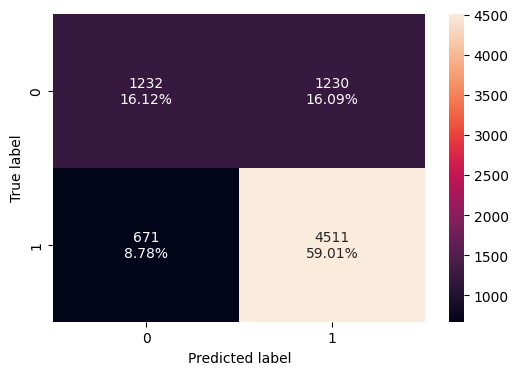

In [ ]:
#Fitting the model
gb_classifier = GradientBoostingClassifier(random_state=1)
gb_classifier.fit(X_train,y_train)

#Calculating different metrics
gb_classifier_model_train_perf=model_performance_classification_sklearn(gb_classifier,X_train,y_train)
print("Training performance:\n",gb_classifier_model_train_perf)
gb_classifier_model_test_perf=model_performance_classification_sklearn(gb_classifier,X_test,y_test)
print("Testing performance:\n",gb_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(gb_classifier,X_test,y_test)

* The gradient boosting classifier is performing well with an F1-score of ~83% with minimal overfitting. This is about the same score as the Random Forest tuned model.
* Now, let's see if we can improve the F1-score using hyperparamter tuning.

### Hyperparameter Tuning

In [ ]:
# Choose the type of classifier.
gb_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [150, 200, 250],
    "subsample":[0.8, 0.9, 1],
    "max_features":[0.7, 0.8, 0.9],
    "learning_rate": [.01, 0.1, 0.2, 0.3]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(gb_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gb_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.7, n_estimators=150, random_state=1,
                           subsample=0.9)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.758746  0.878253   0.784114  0.828518
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.751047  0.868005   0.786776  0.825397


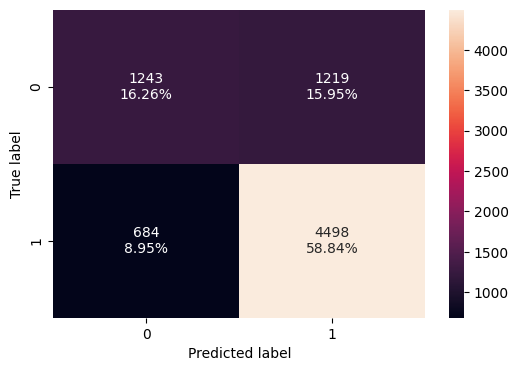

In [ ]:
#Calculating different metrics
gb_tuned_model_train_perf=model_performance_classification_sklearn(gb_tuned,X_train,y_train)
print("Training performance:\n",gb_tuned_model_train_perf)
gb_tuned_model_test_perf=model_performance_classification_sklearn(gb_tuned,X_test,y_test)
print("Testing performance:\n",gb_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(gb_tuned,X_test,y_test)

* There is not much difference in the model performance after hyperparameter tuning. F1-score is still ~83%

**Plotting the feature importance of each variable**

In [ ]:
# Importance of features in the Gradient Boosting Classifier

print(pd.DataFrame(gb_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                        Imp
education_of_employee_High School  0.245916
has_job_experience_Y               0.157097
prevailing_wage                    0.148751
education_of_employee_Master's     0.100972
education_of_employee_Doctorate    0.072706
continent_Europe                   0.058921
unit_of_wage_Year                  0.038693
no_of_employees                    0.035302
region_of_employment_Midwest       0.032189
continent_North America            0.024231
yr_of_estab                        0.017620
region_of_employment_South         0.017018
region_of_employment_West          0.013698
continent_South America            0.009571
requires_job_training_Y            0.007362
region_of_employment_Northeast     0.006337
full_time_position_Y               0.006275
continent_Asia                     0.003964
continent_Oceania                  0.001390
unit_of_wage_Month                 0.001136
unit_of_wage_Week                  0.000851


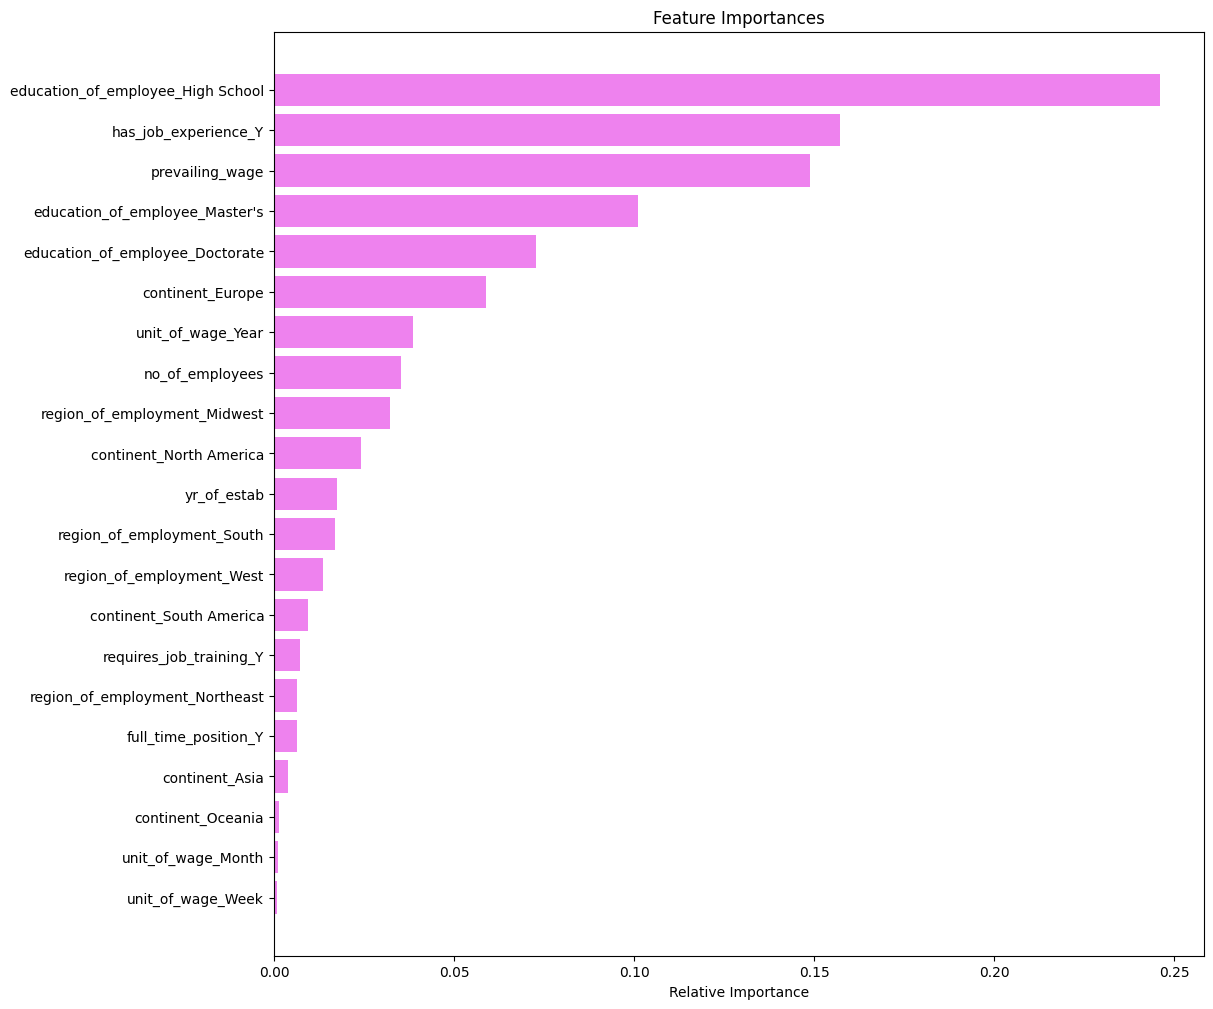

In [ ]:
feature_names = X_train.columns
importances = gb_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

* The number one feature for this Gradient Boosting Classifier is high school education, followed by has job experience, and then prevailing wage.  These are the same three that keep coming up as the important features.
* Masters and Doctorate Education round out the top 5.

####**Observations**
- Gradient Boosting is giving an F1-score of ~83%, and not overfitting the data.
- The top features are High School education, prevailing wage, and has job experience, which has been consistent with other models.  

### XGBoost Classifier

Training performance:
    Accuracy    Recall  Precision        F1
0  0.832305  0.923876   0.839539  0.879691
Testing performance:
    Accuracy   Recall  Precision        F1
0  0.733909  0.85411   0.775947  0.813155


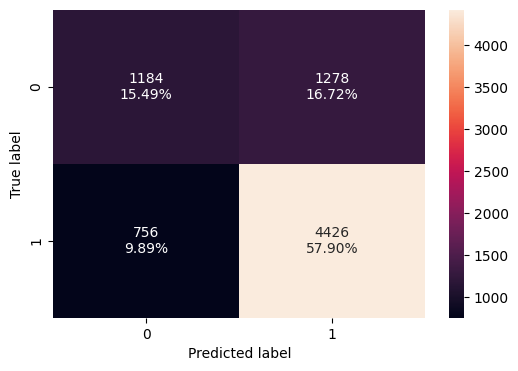

In [ ]:
#Fitting the model
xgb_classifier = XGBClassifier(random_state=1, eval_metric='logloss')
xgb_classifier.fit(X_train,y_train)

#Calculating different metrics
xgb_classifier_model_train_perf=model_performance_classification_sklearn(xgb_classifier,X_train,y_train)
print("Training performance:\n",xgb_classifier_model_train_perf)
xgb_classifier_model_test_perf=model_performance_classification_sklearn(xgb_classifier,X_test,y_test)
print("Testing performance:\n",xgb_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(xgb_classifier,X_test,y_test)

* XGBoost Classifier is overfitting the training data slightly.
* It is giving an F1-Score of ~81%.
* Let's try hyperparameter tuning and see if the model performance improves, and overfitting is reduced.  

### Hyperparameter Tuning

In [ ]:
# Choose the type of classifier.
xgb_tuned = XGBClassifier(random_state=1, eval_metric='logloss')

# Grid of parameters to choose from
parameters = {
    "n_estimators": np.arange(100, 260, 50),
    "scale_pos_weight":[1, 2],
    "subsample":[0.8, 0.9, 1],
    "learning_rate":[0.01, 0.1, 0.2],
    "gamma": [3, 5],
    "colsample_bytree":[0.7, 0.8, 0.9],
    "colsample_bylevel":[0.8 ,0.9, 1]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=1, colsample_bynode=None, colsample_bytree=0.8,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', feature_types=None, gamma=5,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=150, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

Training performance:
    Accuracy    Recall  Precision       F1
0  0.746412  0.913315   0.755574  0.82699
Testing performance:
    Accuracy    Recall  Precision       F1
0  0.747253  0.907372   0.764056  0.82957


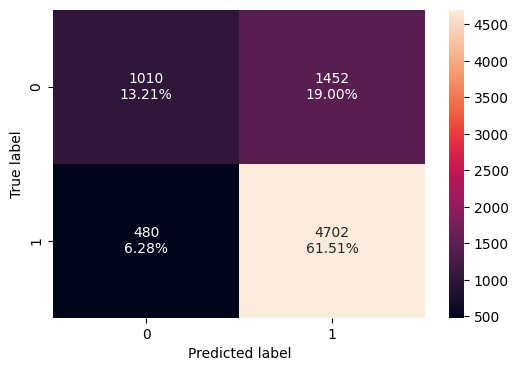

In [ ]:
#Calculating different metrics
xgb_tuned_model_train_perf=model_performance_classification_sklearn(xgb_tuned,X_train,y_train)
print("Training performance:\n",xgb_tuned_model_train_perf)
xgb_tuned_model_test_perf=model_performance_classification_sklearn(xgb_tuned,X_test,y_test)
print("Testing performance:\n",xgb_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(xgb_tuned,X_test,y_test)

* The overfitting has been reduced, and there is a slight improvment (~2%) in F1-score performance to ~83%.

**Plotting the feature importance of each variable**

In [ ]:
# Importance of features in the XGBoost Classifier

print(pd.DataFrame(xgb_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                        Imp
education_of_employee_High School  0.395225
has_job_experience_Y               0.145742
education_of_employee_Master's     0.089061
education_of_employee_Doctorate    0.054684
unit_of_wage_Year                  0.046461
continent_Europe                   0.043568
prevailing_wage                    0.029901
region_of_employment_South         0.024975
region_of_employment_Midwest       0.023469
region_of_employment_West          0.021626
region_of_employment_Northeast     0.019669
continent_North America            0.016631
full_time_position_Y               0.013936
continent_Asia                     0.012516
unit_of_wage_Week                  0.012354
requires_job_training_Y            0.011934
continent_South America            0.009670
unit_of_wage_Month                 0.008164
continent_Oceania                  0.007754
no_of_employees                    0.006552
yr_of_estab                        0.006107


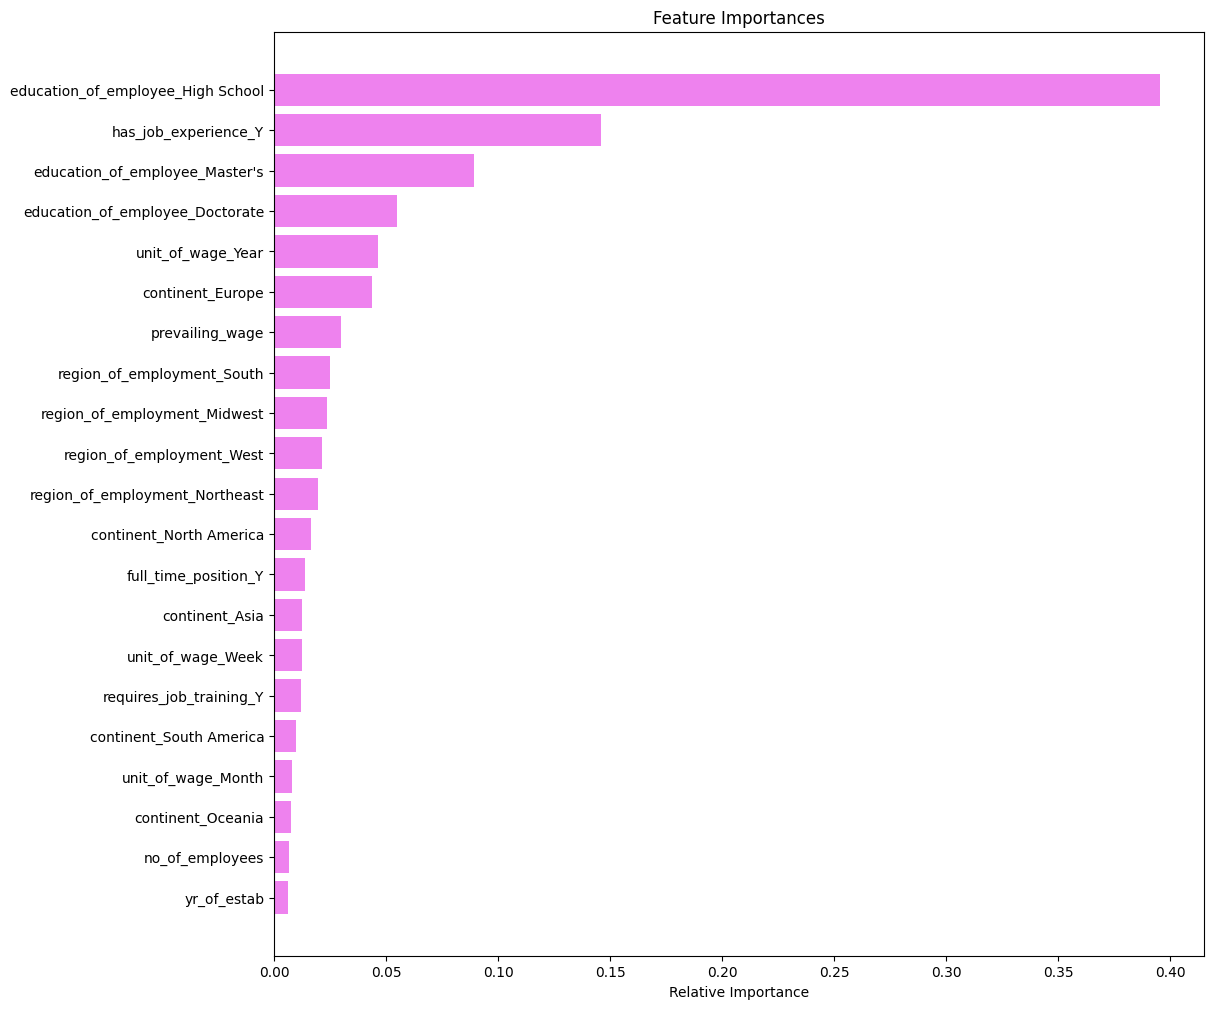

In [ ]:
feature_names = X_train.columns
importances = xgb_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

* The number one feature for this XGBoost Classifier is high school education, followed by has job experience, and then two educational levels of Master's and Doctorate.  
  * This is even showing educational level is even more important than the other features.    
* Yearly unit of wage was next after the educational levels.

####**Observations**
- XGBoost is giving an F1-score of ~83%, and is not overfitting the data.
- The number one important feature was high school education followed by having job experience and then two other educational levels of Master's and Doctorate.

## Stacking Model

In [ ]:
estimators = [('Decision Tree',dtree_estimator), ('Random Forest',rf_tuned), ('AdaBoost', ab_tuned), ('Gradient Boosting',gb_tuned)]

final_estimator = xgb_tuned

stacking_classifier= StackingClassifier(estimators=estimators,final_estimator=final_estimator)

stacking_classifier.fit(X_train,y_train)

StackingClassifier(estimators=[('Decision Tree',
                                DecisionTreeClassifier(max_depth=5,
                                                       max_leaf_nodes=15,
                                                       min_impurity_decrease=0.0001,
                                                       min_samples_leaf=10,
                                                       random_state=1)),
                               ('Random Forest',
                                RandomForestClassifier(max_depth=8,
                                                       min_samples_split=10,
                                                       n_estimators=70,
                                                       oob_score=True,
                                                       random_state=1)),
                               ('AdaBoost',
                                AdaBoostClassifier(base_estimator=DecisionTreeClassi...
                                                 feature_types=None, gamma=5,
                                                 grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=0.01,
                                                 max_bin=None,
                                                 max_cat_threshold=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=None,
                                                 max_leaves=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 multi_strategy=None,
                                                 n_estimators=150, n_jobs=None,
                                                 num_parallel_tree=None,
                                                 random_state=1, ...))

Training performance:
    Accuracy  Recall  Precision        F1
0  0.758971  0.8927   0.777197  0.830954
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.750523  0.880548   0.779867  0.827155


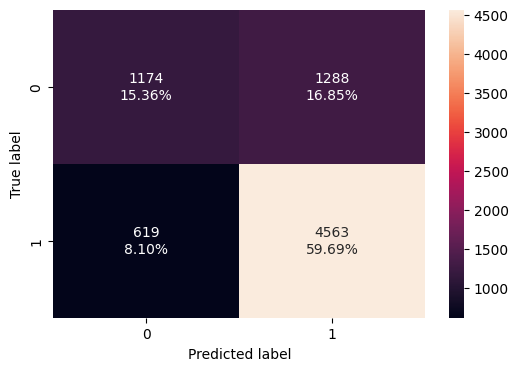

In [ ]:
#Calculating different metrics
stacking_classifier_model_train_perf=model_performance_classification_sklearn(stacking_classifier,X_train,y_train)
print("Training performance:\n",stacking_classifier_model_train_perf)
stacking_classifier_model_test_perf=model_performance_classification_sklearn(stacking_classifier,X_test,y_test)
print("Testing performance:\n",stacking_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(stacking_classifier,X_test,y_test)

**Observations**
* The stacking classifier is giving a F1-score of ~83%, similar to other models (XGBoost Tuned, Gradient Boost Tuned, and Random Forest Tuned).

## Model Performance Comparison and Conclusions

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [d_tree_model_train_perf.T,dtree_estimator_model_train_perf.T,rf_estimator_model_train_perf.T,rf_tuned_model_train_perf.T,
     bagging_classifier_model_train_perf.T,bagging_estimator_tuned_model_train_perf.T,ab_classifier_model_train_perf.T,
     ab_tuned_model_train_perf.T,gb_classifier_model_train_perf.T,gb_tuned_model_train_perf.T,xgb_classifier_model_train_perf.T,
    xgb_tuned_model_train_perf.T,stacking_classifier_model_train_perf.T],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Tuned",
    "Random Forest",
    "Random Forest Tuned",
    "Bagging",
    "Bagging Tuned",
    "Adaboost",
    "Adabosst Tuned",
    "Gradient Boost",
    "Gradient Boost Tuned",
    "XGBoost",
    "XGBoost Tuned",
    "Stacking"]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree,Decision Tree Tuned,Random Forest,Random Forest Tuned,Bagging,Bagging Tuned,Adaboost,Adabosst Tuned,Gradient Boost,Gradient Boost Tuned,XGBoost,XGBoost Tuned,Stacking
Accuracy,1.0,0.733068,0.999944,0.753644,0.984526,0.996187,0.737441,0.753308,0.755607,0.758746,0.832305,0.746412,0.758971
Recall,1.0,0.911203,1.000000,0.915090,0.985468,0.999916,0.885941,0.877915,0.876479,0.878253,0.923876,0.913315,0.892700
Precision,1.0,0.744050,0.999916,0.761674,0.991162,0.994371,0.758810,0.778585,0.781704,0.784114,0.839539,0.755574,0.777197
F1,1.0,0.819187,0.999958,0.831363,0.988307,0.997135,0.817462,0.825272,0.826383,0.828518,0.879691,0.826990,0.830954


In [ ]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [d_tree_model_test_perf.T,dtree_estimator_model_test_perf.T,rf_estimator_model_test_perf.T,rf_tuned_model_test_perf.T,
     bagging_classifier_model_test_perf.T,bagging_estimator_tuned_model_test_perf.T,ab_classifier_model_test_perf.T,
     ab_tuned_model_test_perf.T,gb_classifier_model_test_perf.T,gb_tuned_model_test_perf.T,xgb_classifier_model_test_perf.T,
    xgb_tuned_model_test_perf.T,stacking_classifier_model_test_perf.T],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Tuned",
    "Random Forest",
    "Random Forest Tuned",
    "Bagging",
    "Bagging Tuned",
    "Adaboost",
    "Adabosst Tuned",
    "Gradient Boost",
    "Gradient Boost Tuned",
    "XGBoost",
    "XGBoost Tuned",
    "Stacking"]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Decision Tree,Decision Tree Tuned,Random Forest,Random Forest Tuned,Bagging,Bagging Tuned,Adaboost,Adabosst Tuned,Gradient Boost,Gradient Boost Tuned,XGBoost,XGBoost Tuned,Stacking
Accuracy,0.664050,0.738095,0.727368,0.747776,0.696102,0.733909,0.738488,0.749215,0.751308,0.751047,0.733909,0.747253,0.750523
Recall,0.742184,0.906407,0.833655,0.905828,0.773061,0.899074,0.885951,0.871864,0.870513,0.868005,0.854110,0.907372,0.880548
Precision,0.757385,0.755874,0.779502,0.765243,0.777411,0.755105,0.765294,0.782880,0.785752,0.786776,0.775947,0.764056,0.779867
F1,0.749708,0.824324,0.805670,0.829622,0.775230,0.820825,0.821215,0.824979,0.825964,0.825397,0.813155,0.829570,0.827155


**Overall Observations on Models:**

There were four models that gave the highest F1-score of ~83%, and they are:

- `Random Forest Tuned`
  - Random Forest Model after being tuned had very minimal overfitting. High School education was the number one important feature with job experience and prevailing wage following, but it also had educational levels of Master's and Doctorate were also high in the importance features.

- `Gradient Boost Tuned`
  - After being tuned the gradient boost did well on minimizing overfitting. The number one feature was high school education, followed by has job experience, and then prevailing wage, with Master's and Doctorate Education rounding out the top 5.

- `XGBoost Tuned`
  - XGBoost after being tuned had very minimal overfitting. High School education was the number one important feature with job experience next, and
  then two educational levels of Master's and Doctorate. Yearly unit of wage was next after the educational levels. This shows the importance of educational level in determining if a VISA is Certified or Denied.

- `Stacking`
  - Did well and did not overfit the data.


**Model to be used for VISA approval process:**

I would choose the `**XGBoost Tuned**` model for deciding if a VISA applicant will be Certified or Denied. Mainly because of how much weight is given to educational levels.  It makes sense that higher educated employees would be sought after, and would help improve the economy where they would be employeed. Then adding on that having job experience also was a big factor makes sense as well because then it shows they have experience in the field for which they are applying.  The model also gave a high recall score of ~91%, and Accuracy of ~75% and Percision of ~76%.

## Actionable Insights and Recommendations

- *Education* is the number one factor that has the largest impact if an applicant will be Certified or not.
  - High School Education was Denied approximately 66% of the time
  - *Higher Educational levels coincide with higher percentage of being Certified for a VISA*
- *Having Job Experience* also was a considerable factor for being Certified. There was a ~20% differene in certification rate between having experieence and not having experience.
- *Europe* and *Africa* had a higher Certification rate, and this could be because these continents had high percentage of Doctorate's and Master's respectively.



**Recommendations**:
- `Education` is by far the leading factor; therefore,
  - Giving higher priority (Certified) to applicants applying for a VISA with higher education (*Master's or Doctorate's*).  These applicants will bring value add to the US economy, by bringing their knowledge they have gained through their educational pursuits.
  - Giving low priority (Denied) shall be given to applicants with only a *high school degree*, since this is the number one factor in determining denial of a VISA. These applicants are also the highest percentage for hourly wage.

- `Having Work Experience` is another factor to consider when an applicant is applying for a VISA. If the applicant has had employment in the related field to which they are applying this shows they will be suited for doing the same to help the US economy in a positive manner.  This factor would be best suited for applicants with a Bachlor's because this then demonstrates they have been applying the knowledge they have gained in their educational pursuits and will be better adapt to a new employment abroad.
  

- Using the `XGBoost Tuned Model` to predict if a VISA will be Certified or Denied will help minimize the mistakes made through the application process. Thus, givng certifications and denials appropriately to better help improve the US economy.
